# pythia-bias-multicore

In [1]:
from importlib import reload

from matplotlib import cm
import numpy as np

from utils import plots, tables, utils
#%matplotlib widget

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
# Knobs
paths = { 
    # 2-core
    'degree1_baseline_2c': '/u/cmolder/GitHub/ChampSim/out/pythia/2core/degree1_baseline.csv',
    'degree1_tuned_2c': '/u/cmolder/GitHub/ChampSim/out/pythia/2core/degree1_tuned.csv',
    'degree1_biasonly_2c': '/u/cmolder/GitHub/ChampSim/out/pythia/2core/degree1_biasonly.csv',
    'degree1_biasonly_tuned_2c': '/u/cmolder/GitHub/ChampSim/out/pythia/2core/degree1_biasonly_tuned.csv',
    # 4-core
    'degree1_baseline_4c': '/u/cmolder/GitHub/ChampSim/out/pythia/4core/degree1_baseline.csv', # FIXME: mcf has missing results, milc has deadlock
    # 8-core
    'degree1_baseline_8c': '/u/cmolder/GitHub/ChampSim/out/pythia/8core/degree1_baseline.csv', # FIXME: a lot of errors
}

suites = [
    ('spec06', 'one_phase'),
    #('spec06', 'weighted'),
    ('gap', 'one_phase')
]
metrics  = [
    'ipc_improvement', 
    'L2C_issued_prefetches', 
    'L2C_accuracy', 
    'L2C_coverage',
    #'L2C_mpki_reduction', 
]
features = [
    {'Delta_Path', 'PC_Delta'},
    {'Delta_Path', 'PC_Delta', 'Page'},
    {'Delta_Path', 'PC_Delta', 'Page', 'Offset'},
]
baselines = [
    'bo'
]
dpi = 150

# Plots (suites)
Fix prefetch degree to 1 for everything.

In [3]:
dfs = {
    # 2-core
    'baseline_2c': tables.load_stats_csv(paths['degree1_baseline_2c'], baselines, prefetchers_level='l2'),
    'degree1_2c': tables.load_stats_csv_pythia(paths['degree1_baseline_2c'], features),
    'degree1_tuned_2c': tables.load_stats_csv_pythia(paths['degree1_tuned_2c'], features),
    'degree1_biasonly_2c':  tables.load_stats_csv(paths['degree1_biasonly_2c'], ['pythia'], prefetchers_level='l2'),
    'degree1_biasonly_tuned_2c': tables.load_stats_csv(paths['degree1_biasonly_tuned_2c'], ['pythia'], prefetchers_level='l2'),
    # 4-core
    'baseline_4c': tables.load_stats_csv(paths['degree1_baseline_4c'], baselines, prefetchers_level='l2'),
    'degree1_4c': tables.load_stats_csv_pythia(paths['degree1_baseline_4c'], features),
    # 8-core
    'baseline_8c': tables.load_stats_csv(paths['degree1_baseline_8c'], baselines, prefetchers_level='l2'),
    'degree1_8c': tables.load_stats_csv_pythia(paths['degree1_baseline_8c'], features),
}

/u/cmolder/GitHub/pythia-analysis/utils/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)
/u/cmolder/GitHub/pythia-analysis/utils/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)
/u/cmolder/GitHub/pythia-analysis/utils/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpo

## 2-core

=== spec06 weighted ===


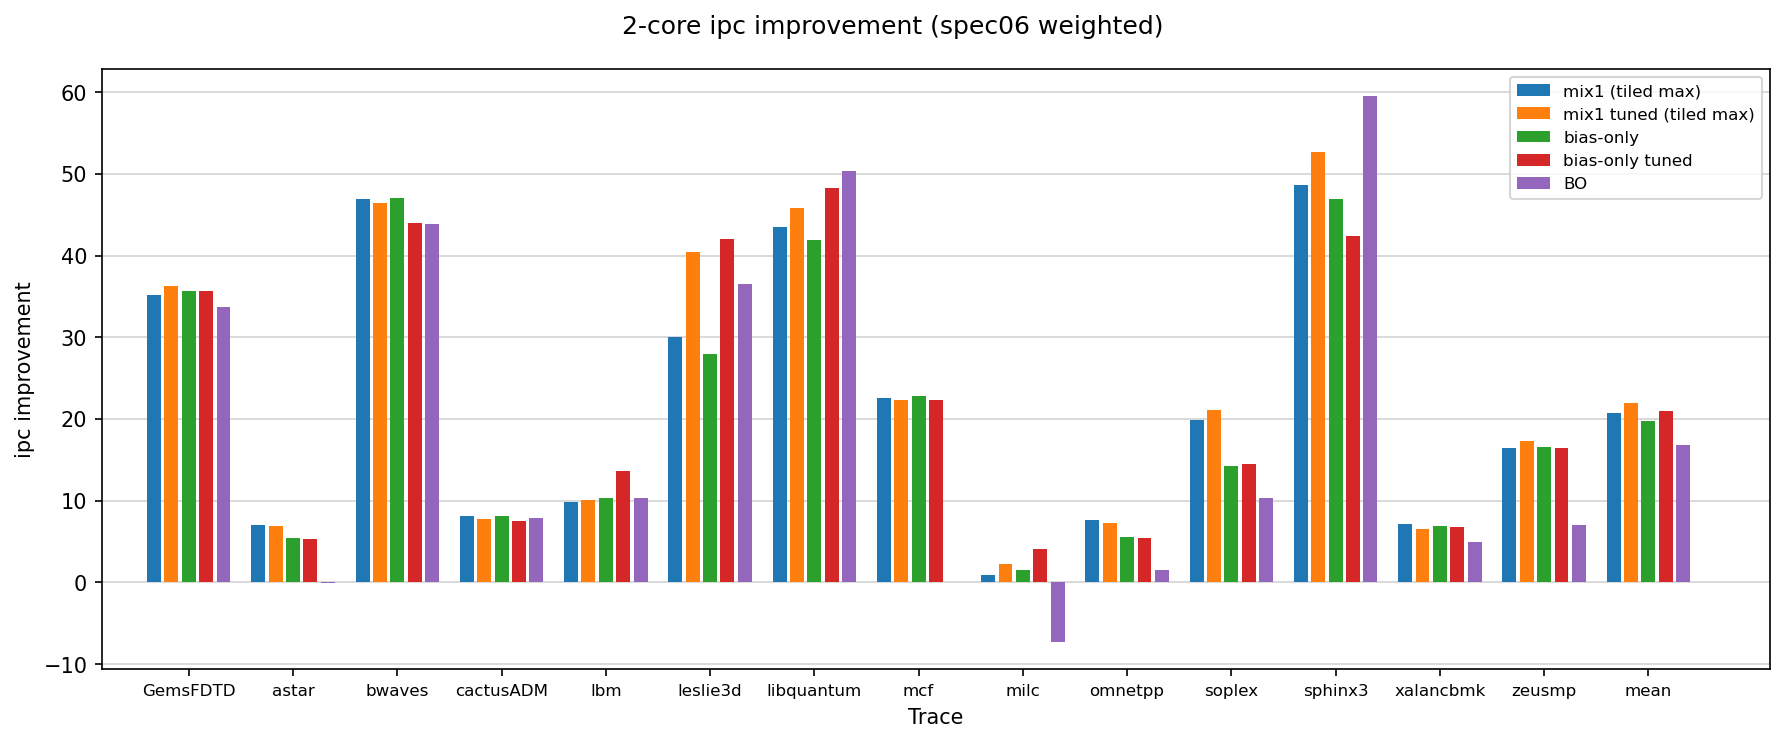

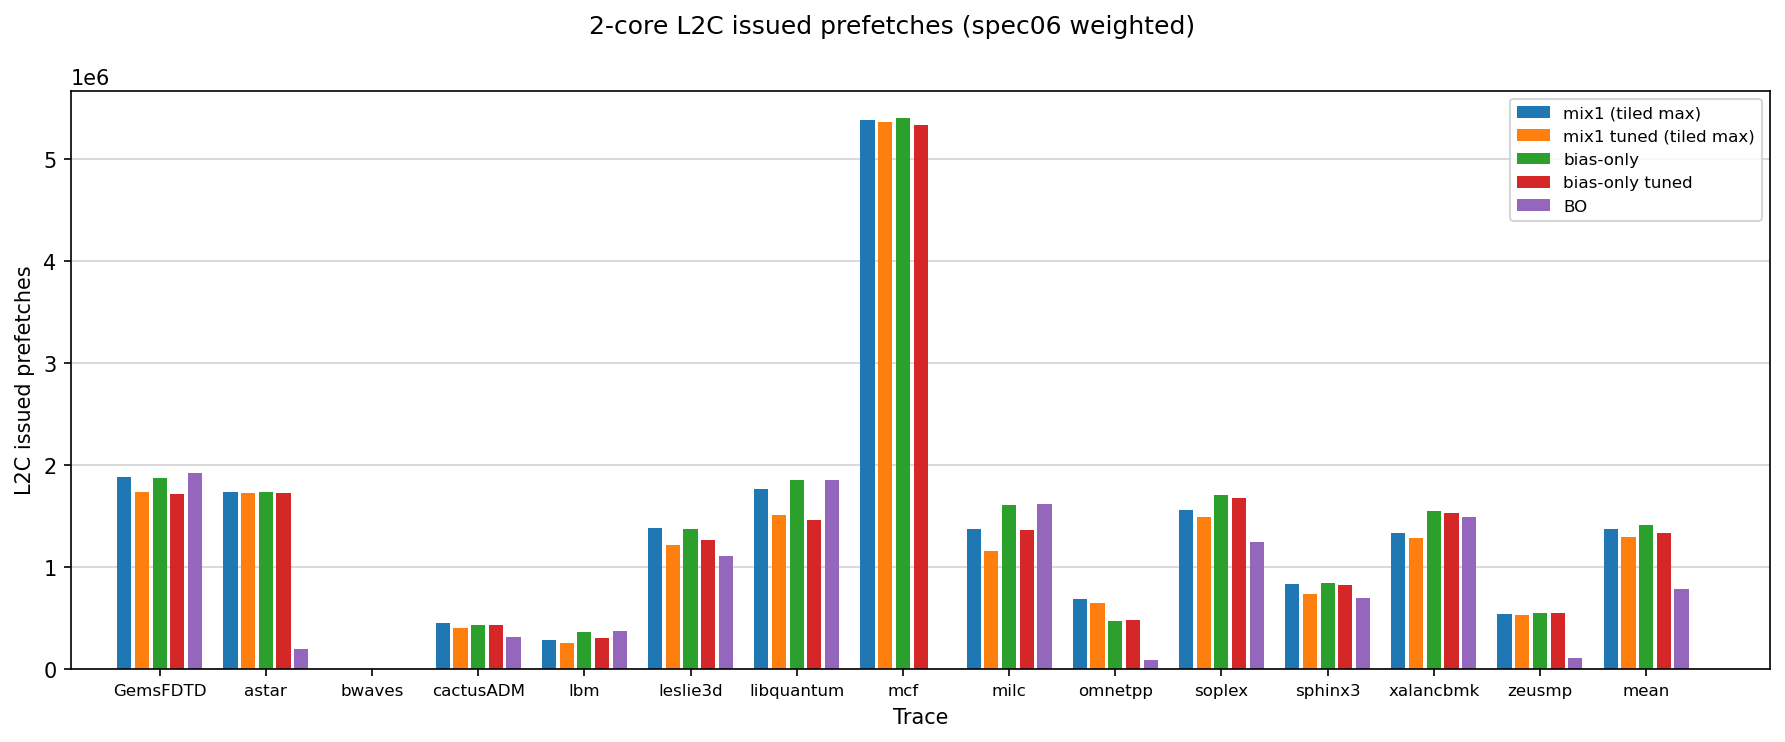

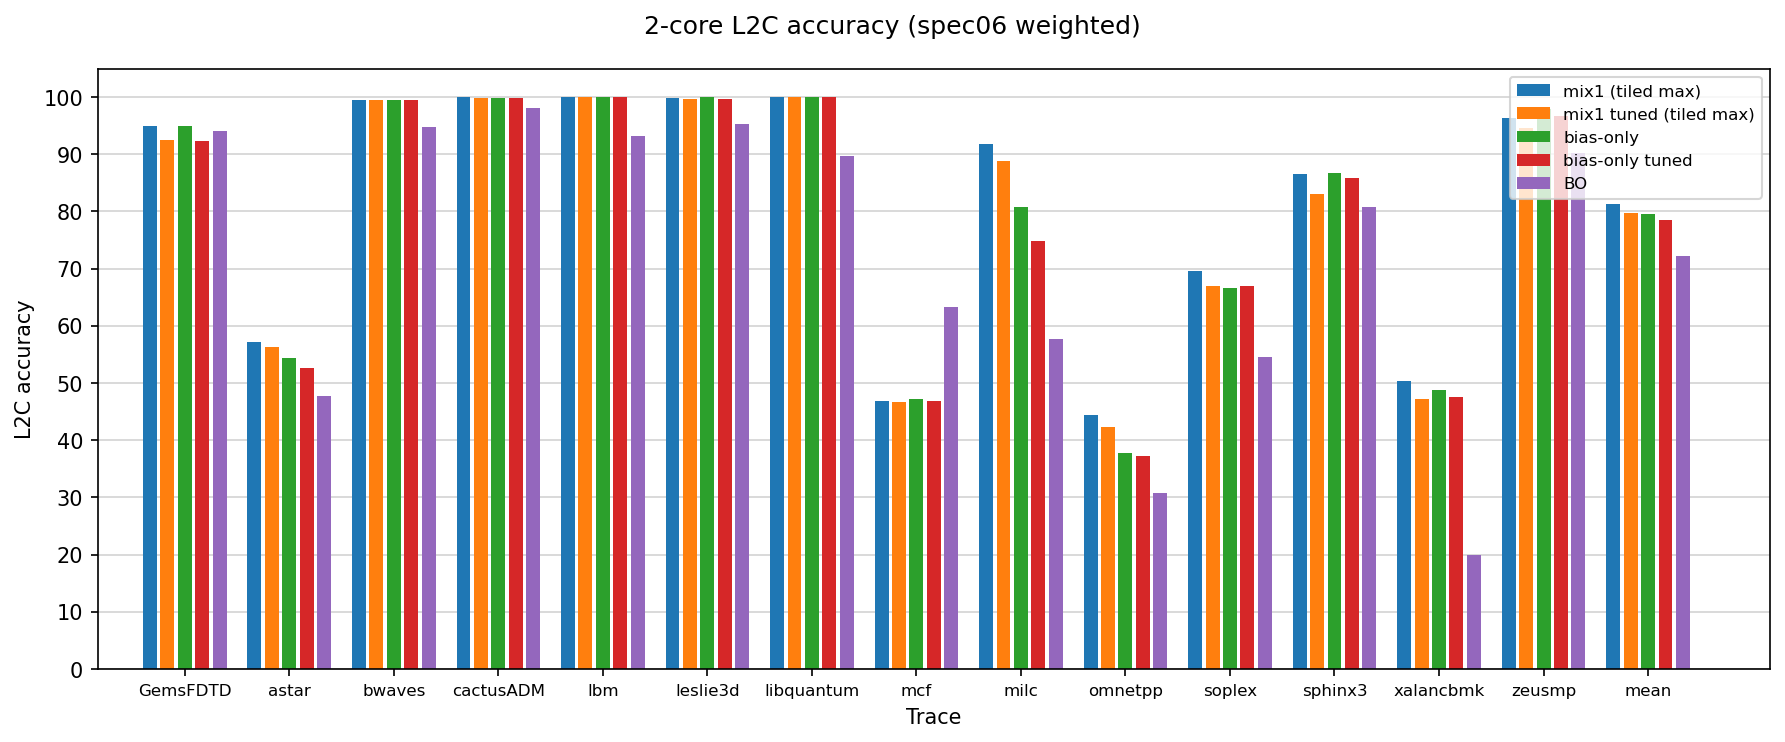

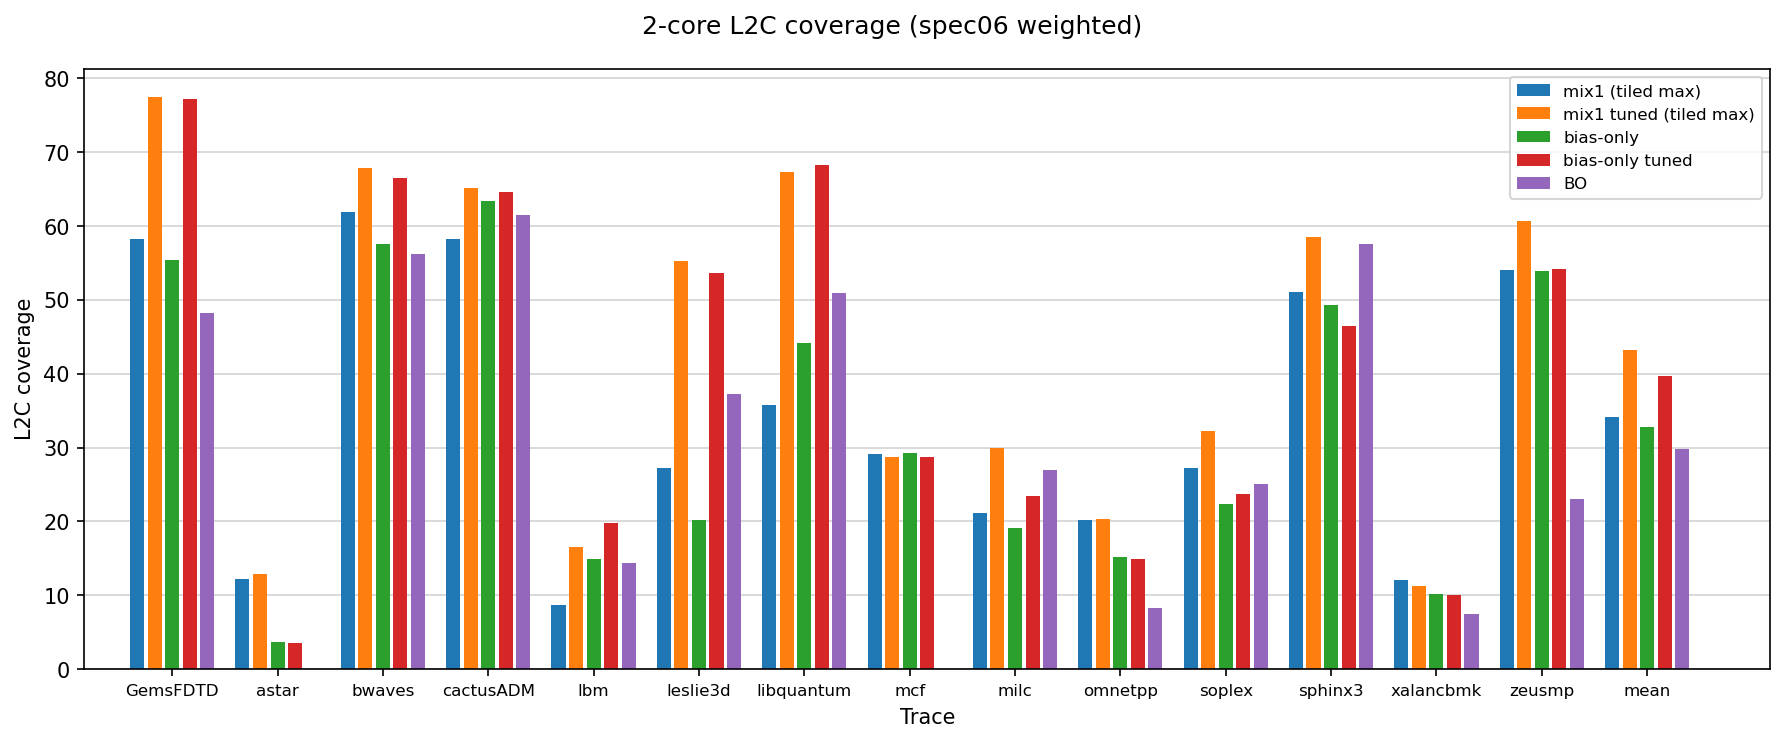

=== gap one_phase ===


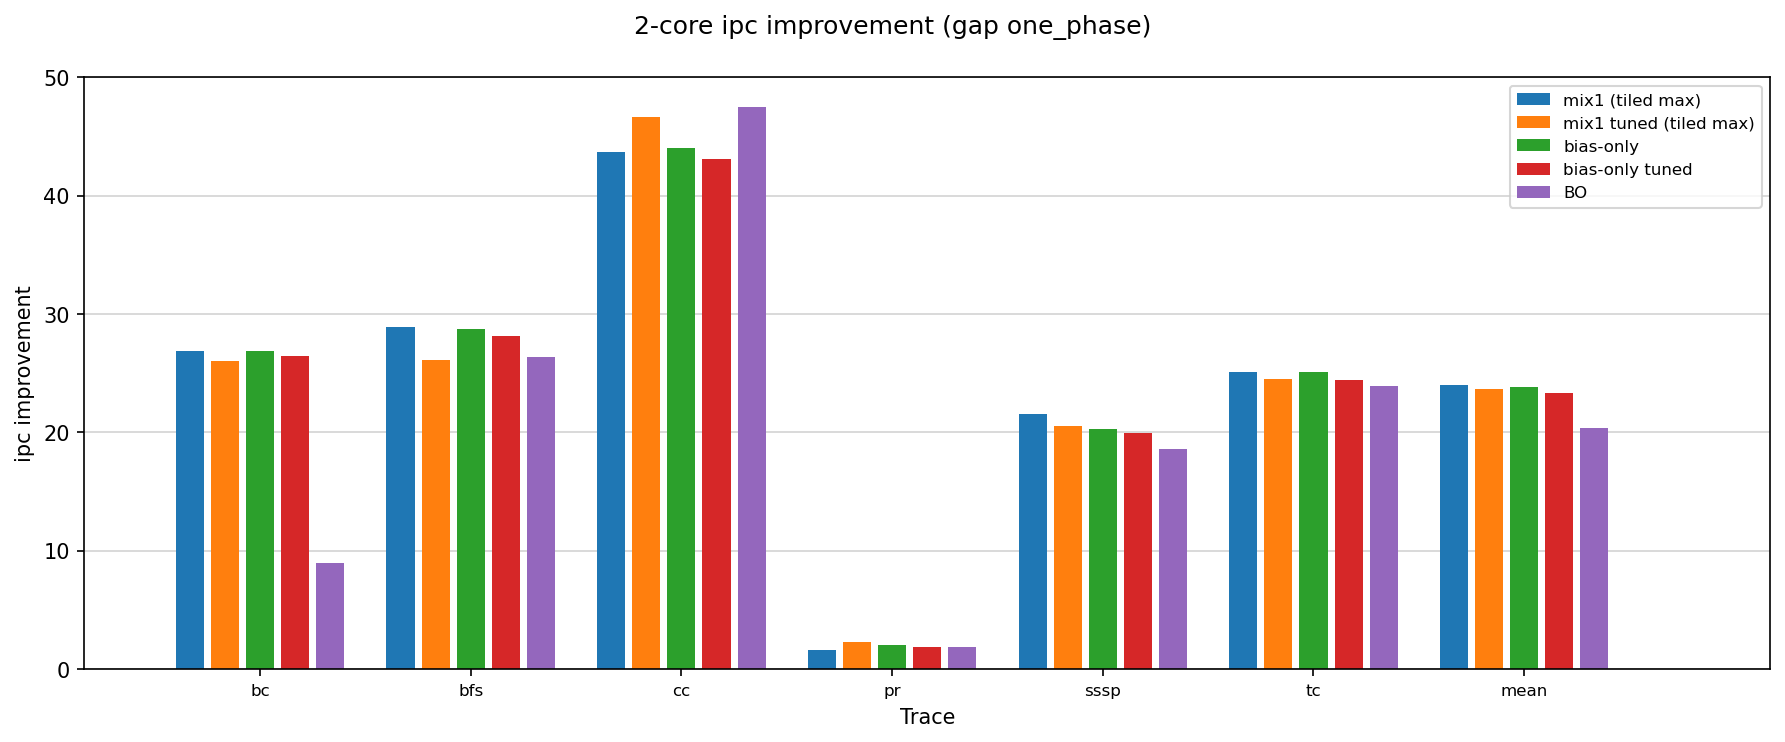

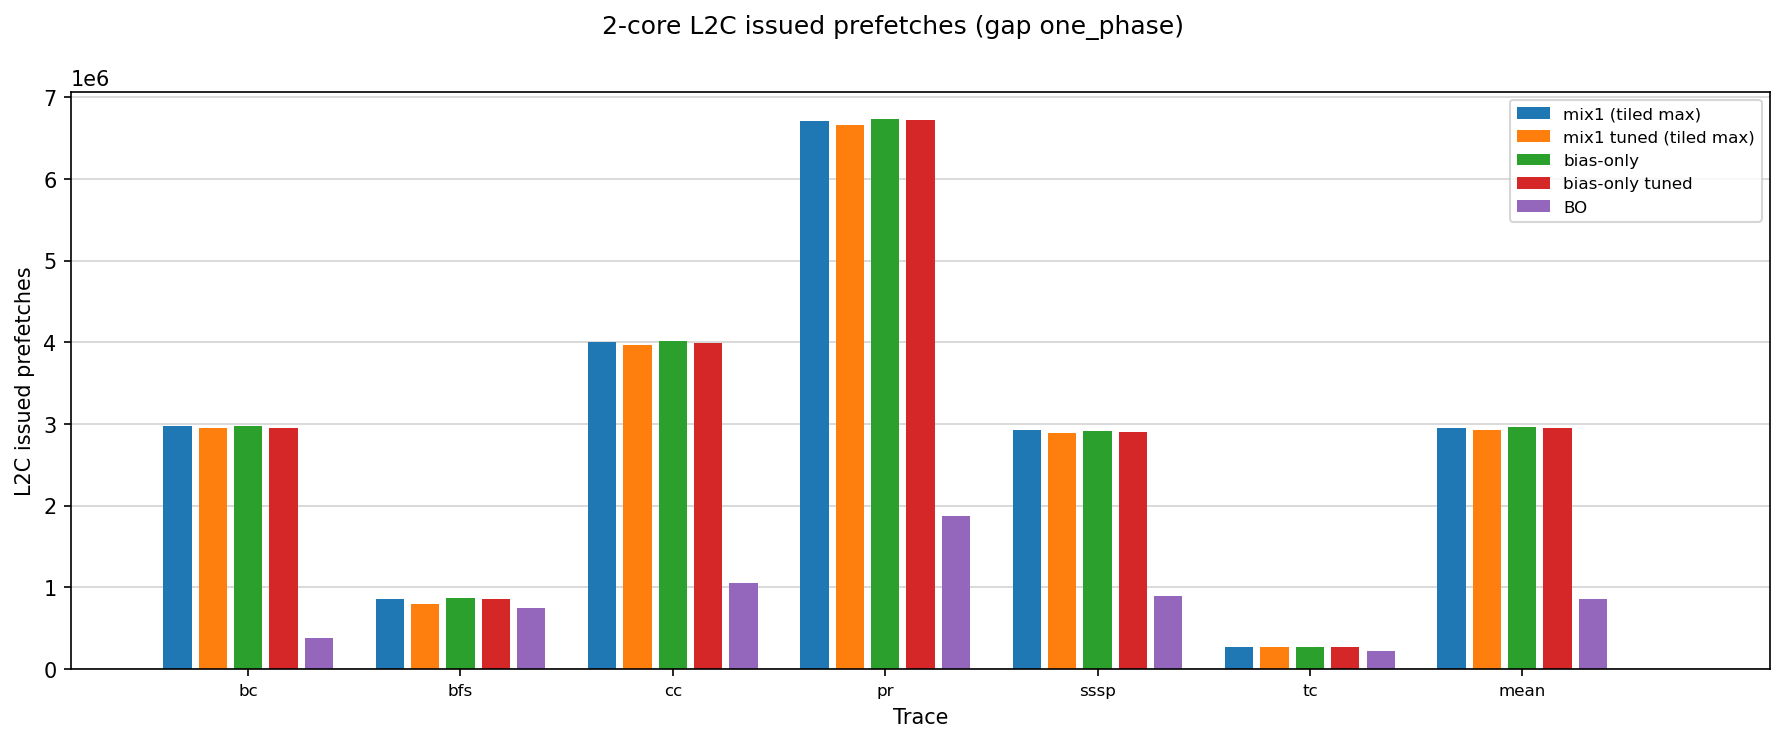

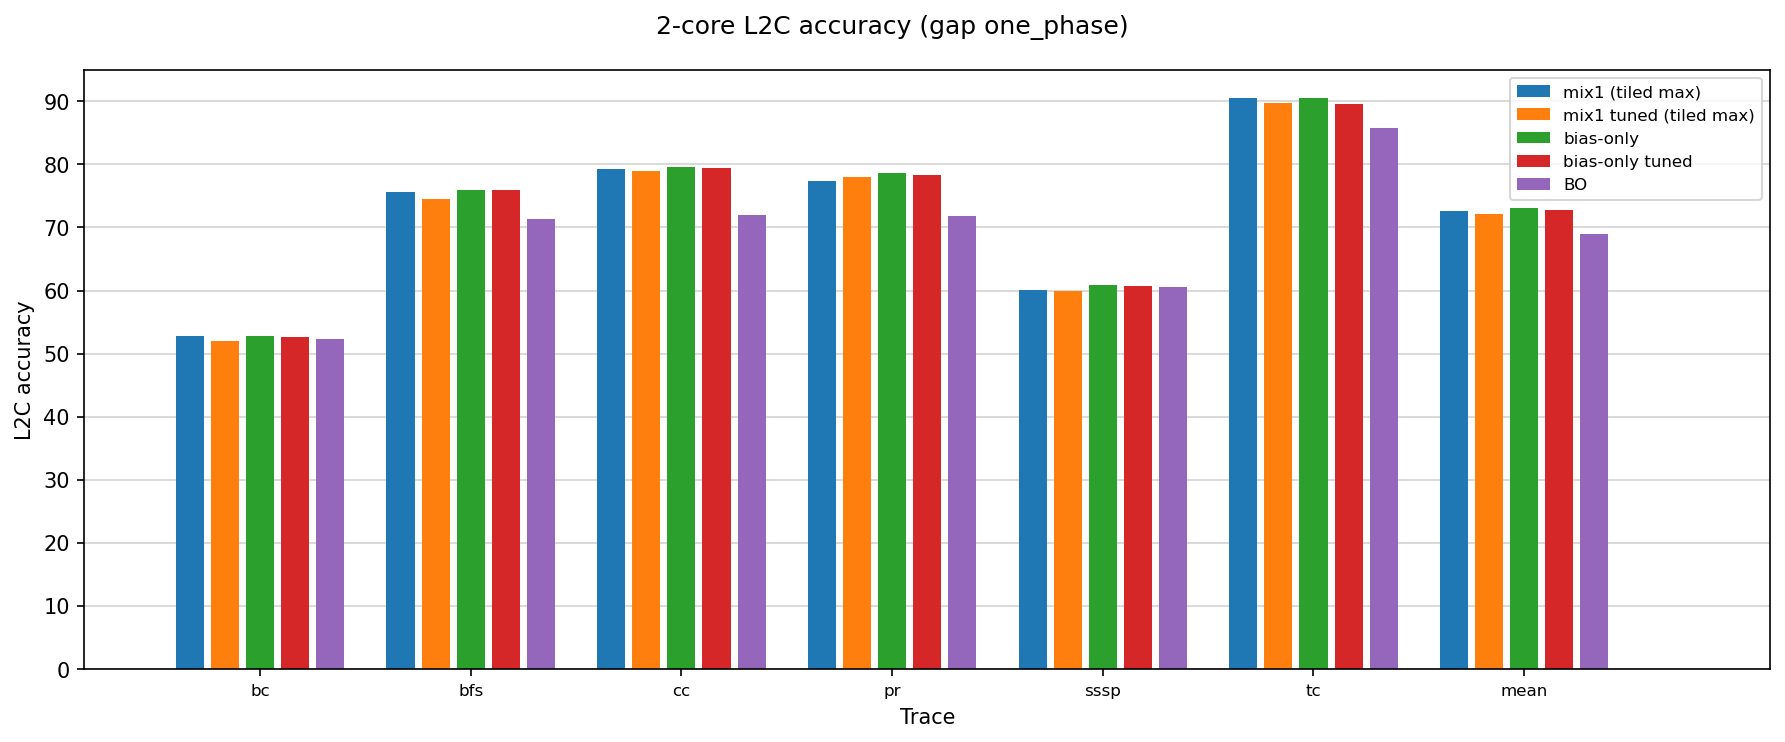

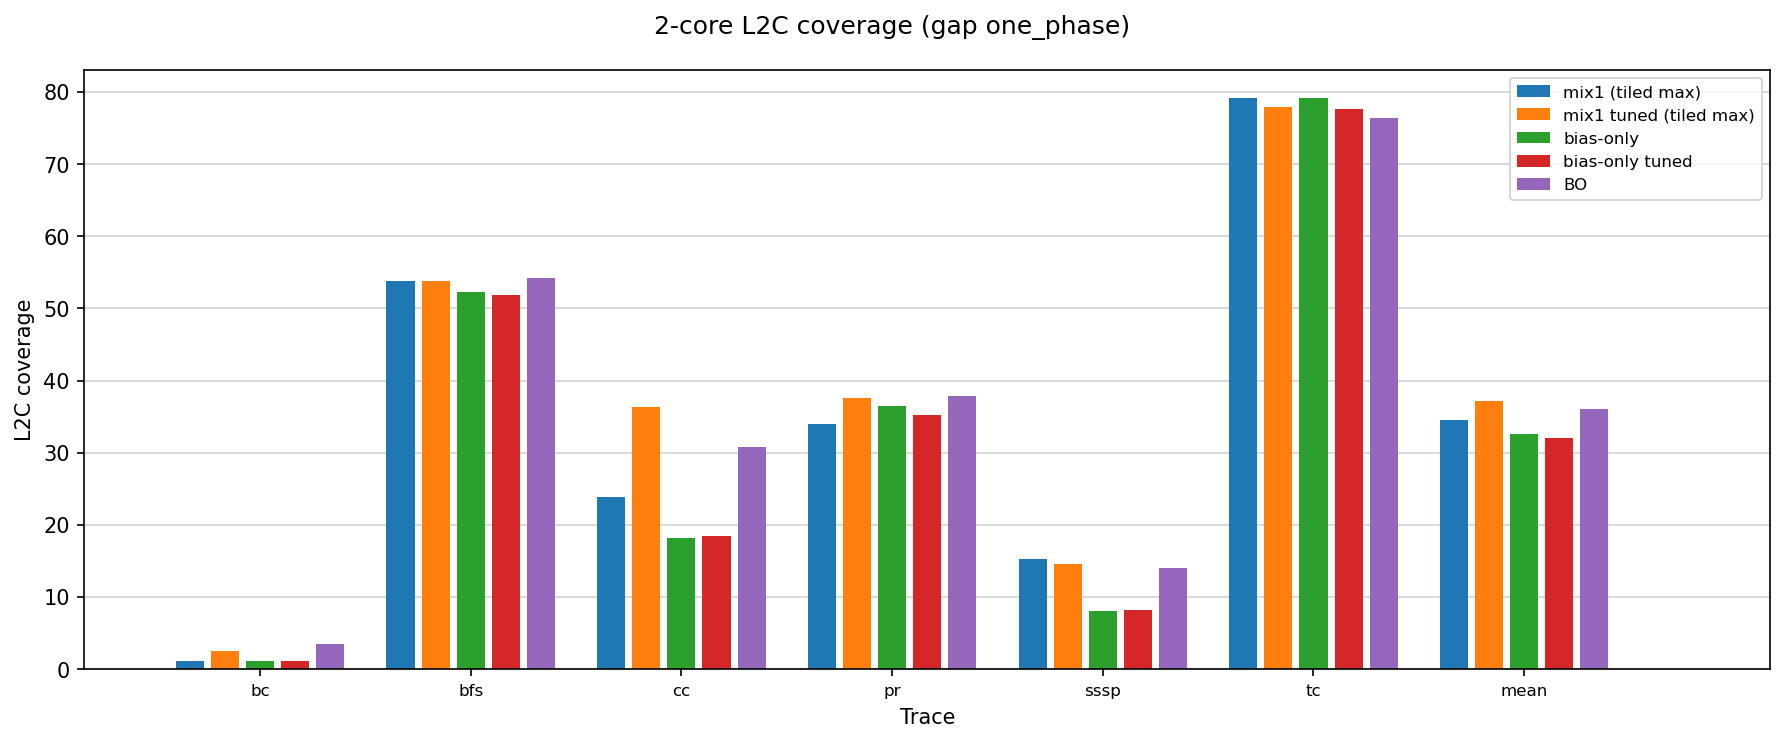

In [4]:
df_2core = {
    'mix1 (tiled max)': dfs['degree1_2c']['Delta_Path, PC_Delta'],
    #'mix2 (tiled max)': dfs['degree1_2c']['Delta_Path, PC_Delta, Page'],
    #'mix3 (tiled max)': dfs['degree1_2c']['Delta_Path, Offset, PC_Delta, Page'],
    'mix1 tuned (tiled max)': dfs['degree1_tuned_2c']['Delta_Path, PC_Delta'],
    'bias-only': dfs['degree1_biasonly_2c']['pythia'],
    'bias-only tuned': dfs['degree1_biasonly_tuned_2c']['pythia'],
    'BO': dfs['baseline_2c']['bo'],
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
df_2core_colors = {
    'BO': 'C4'
}
label_kwargs = {
    'fontsize': 8,
    'rotation': 0
}
plots.plot_everything(df_2core, suites=suites, metrics=metrics, 
                      colors=df_2core_colors, dpi=dpi, figsize=(12, 5),
                      suptitle='2-core',
                      legend_kwargs=legend_kwargs, label_kwargs=label_kwargs)

## 4-core

=== spec06 weighted ===


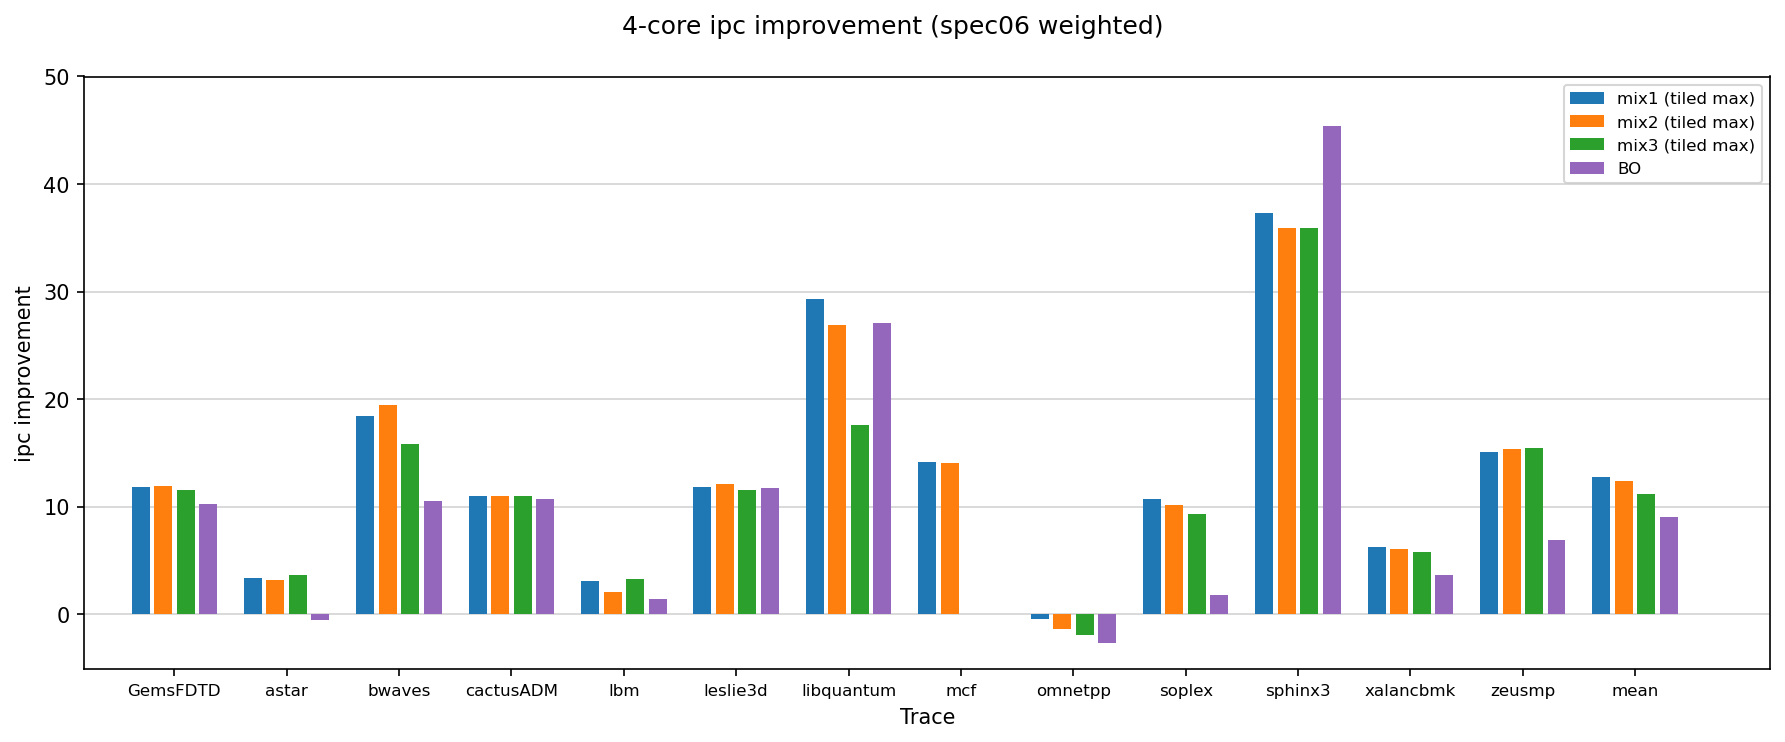

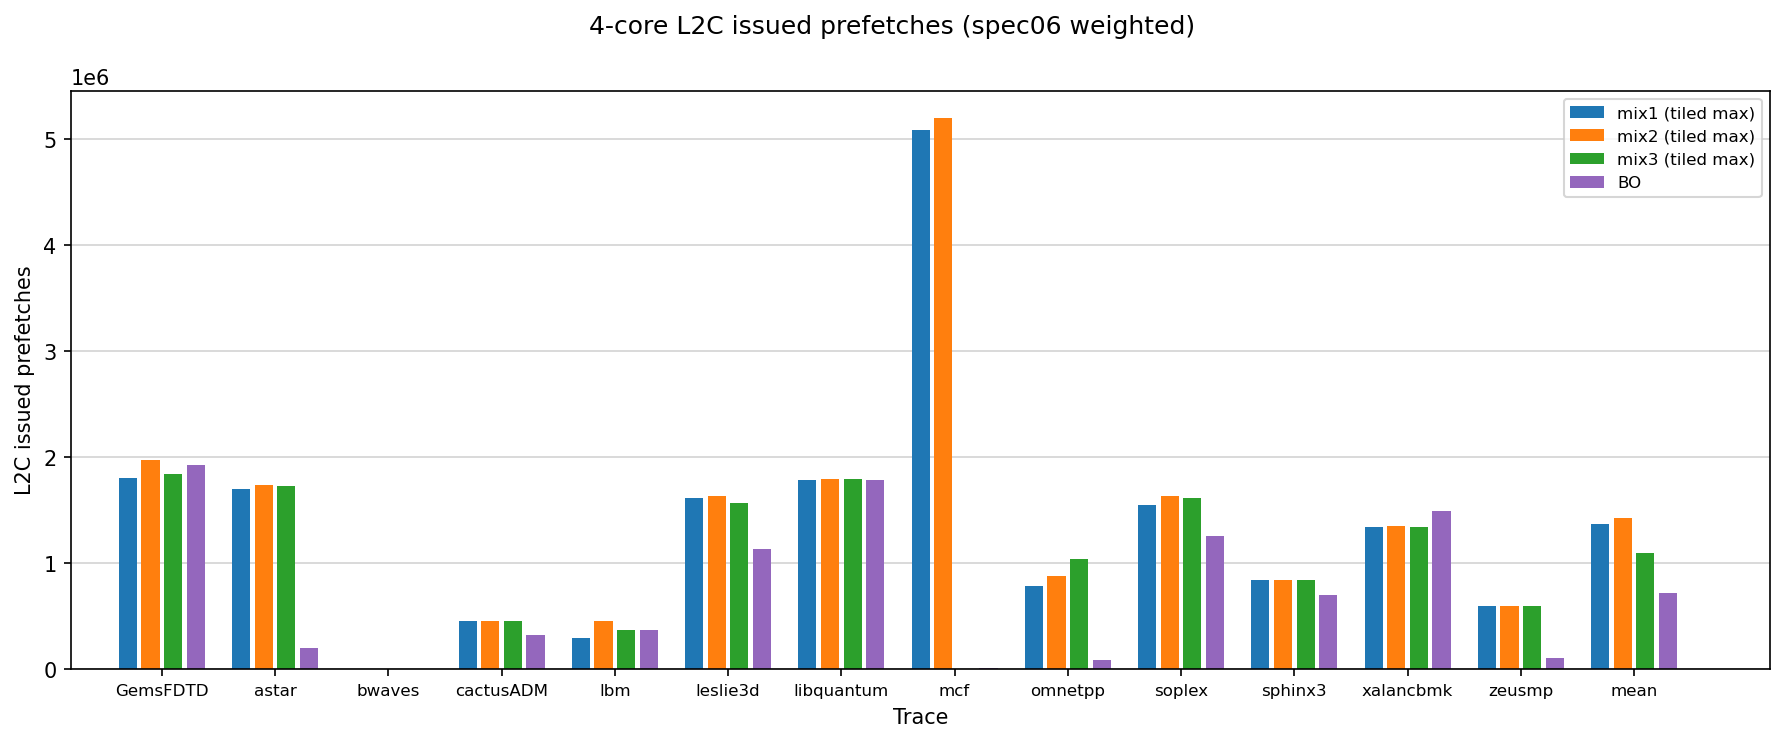

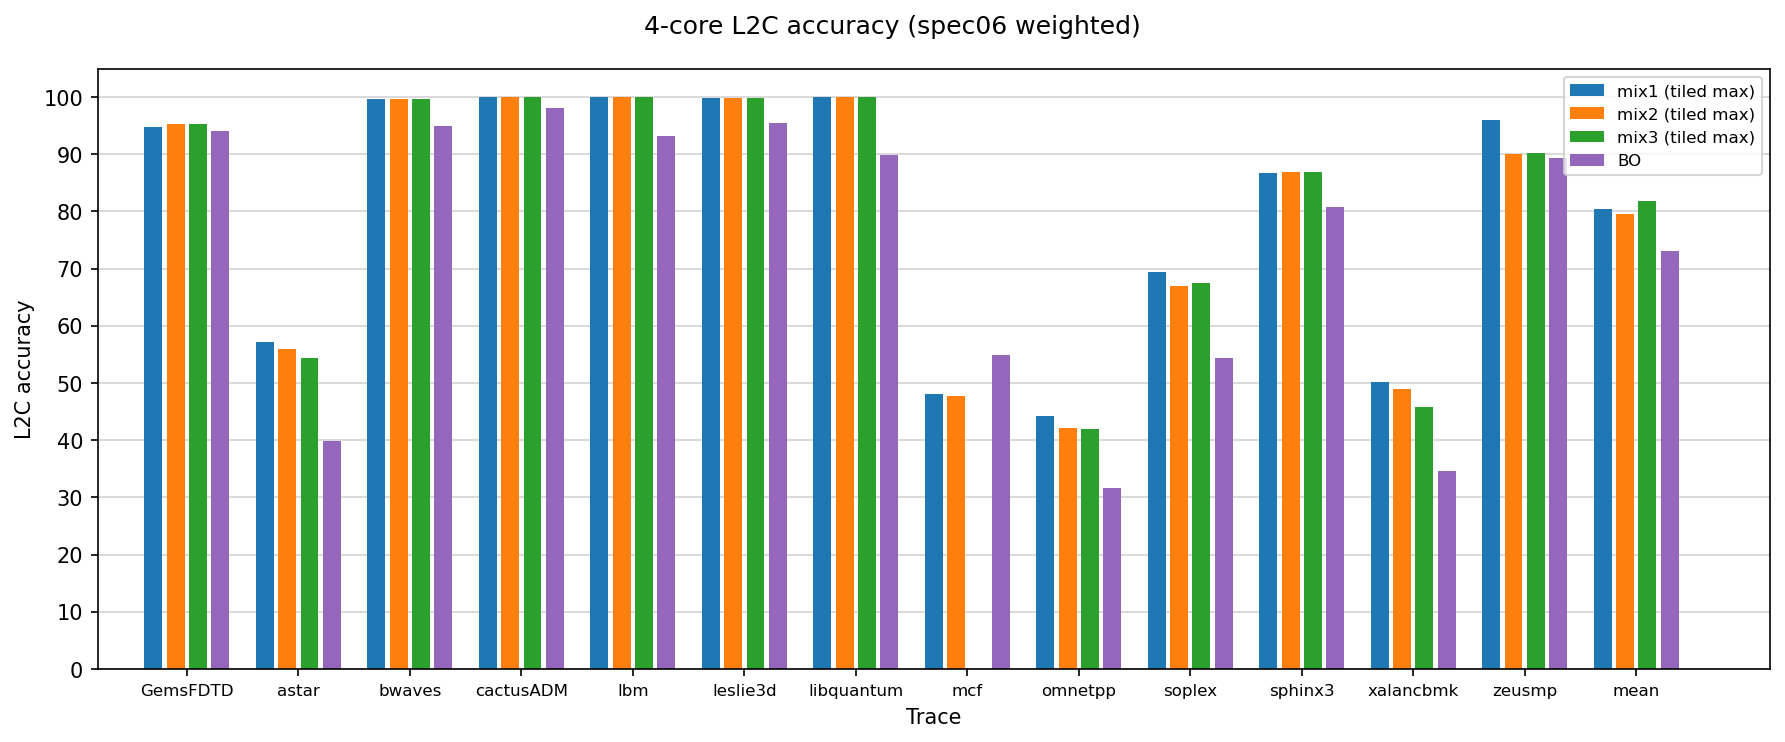

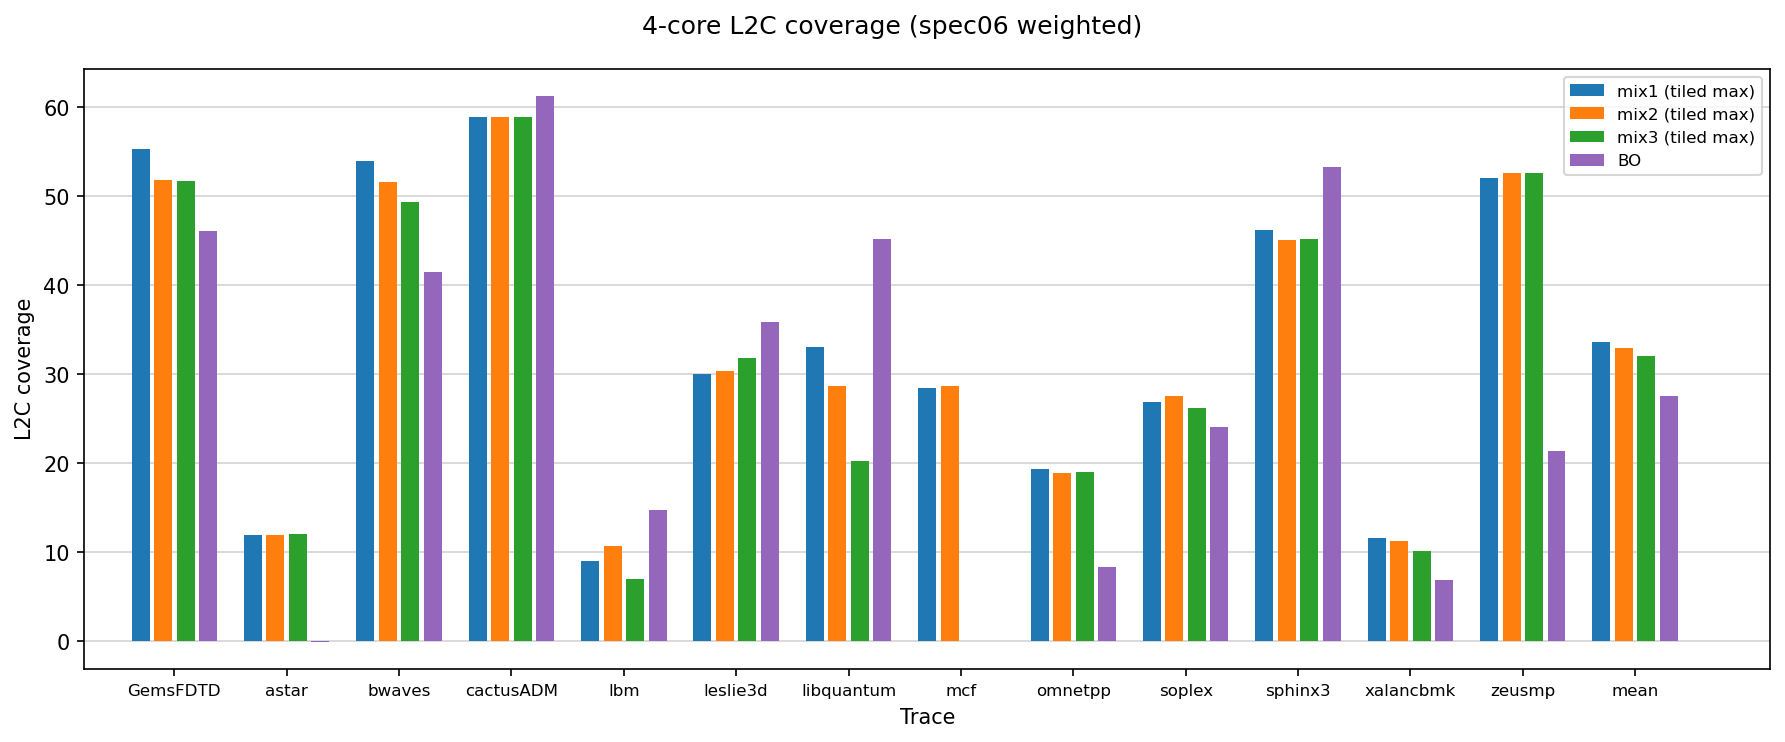

=== gap one_phase ===


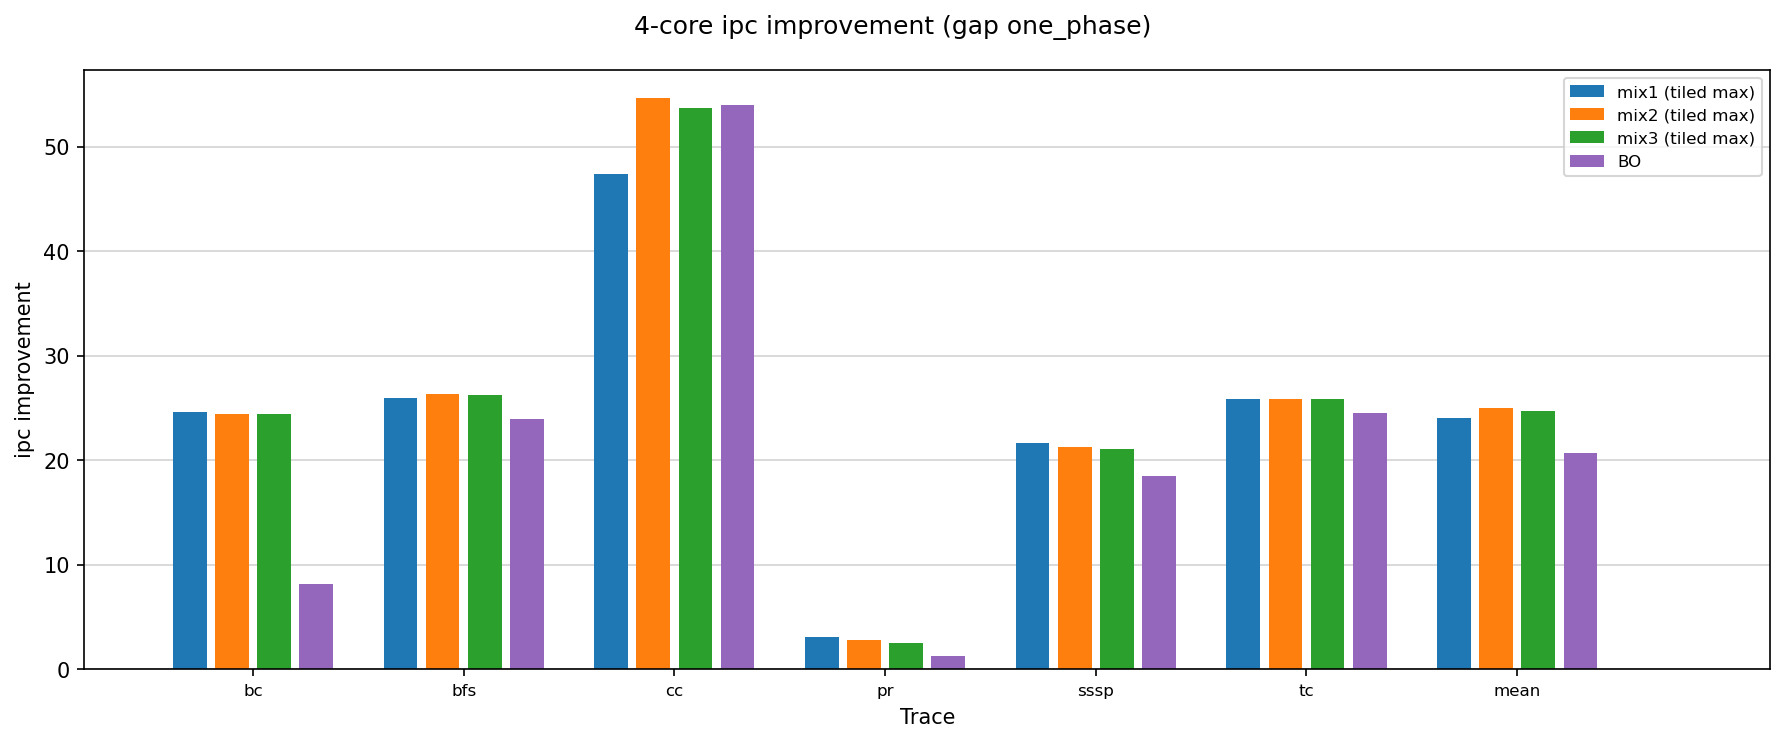

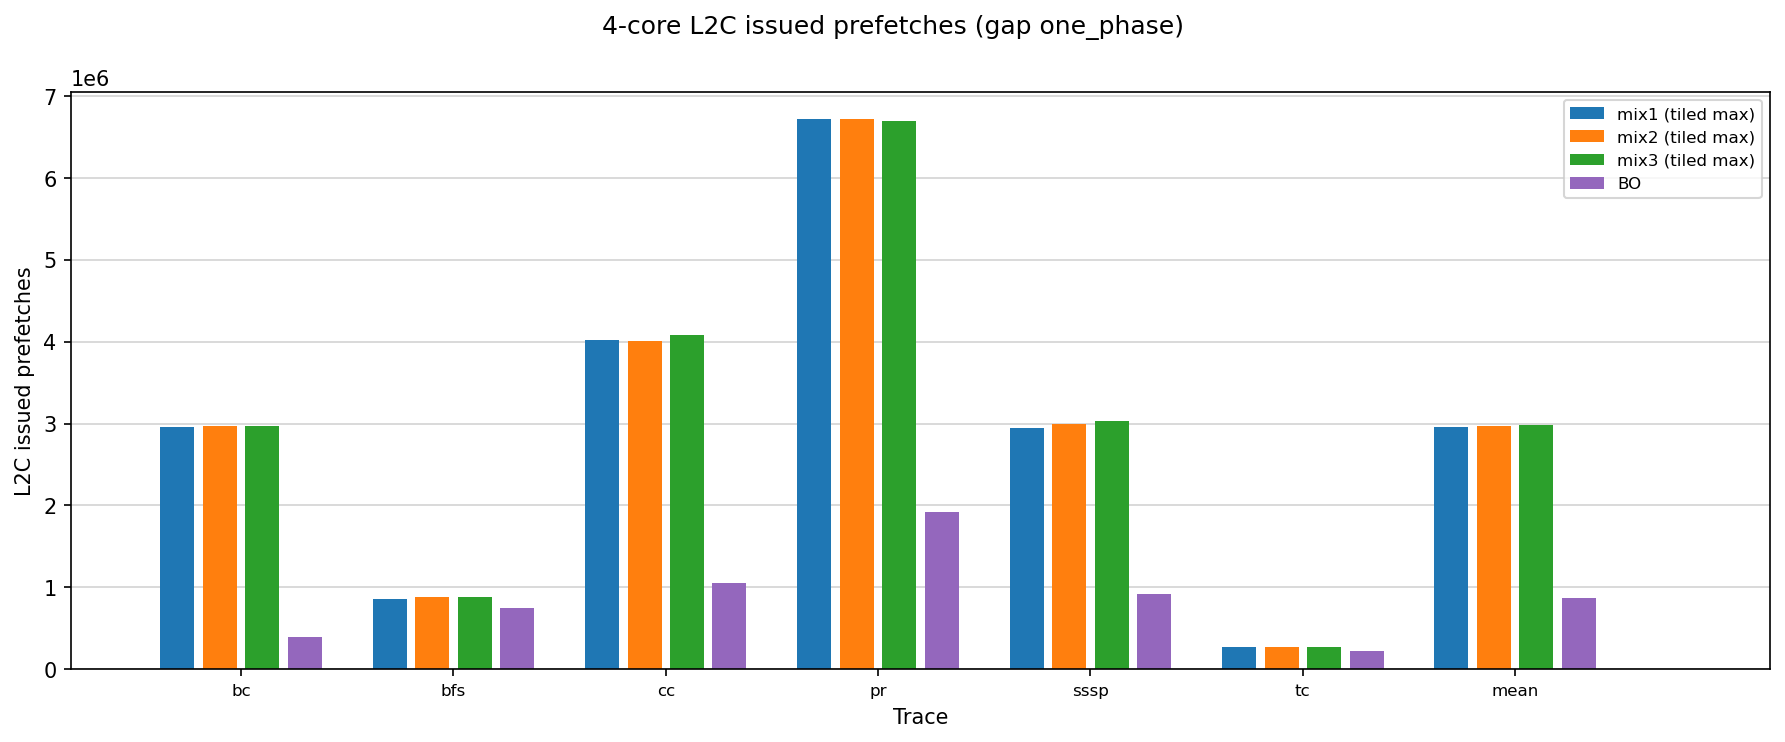

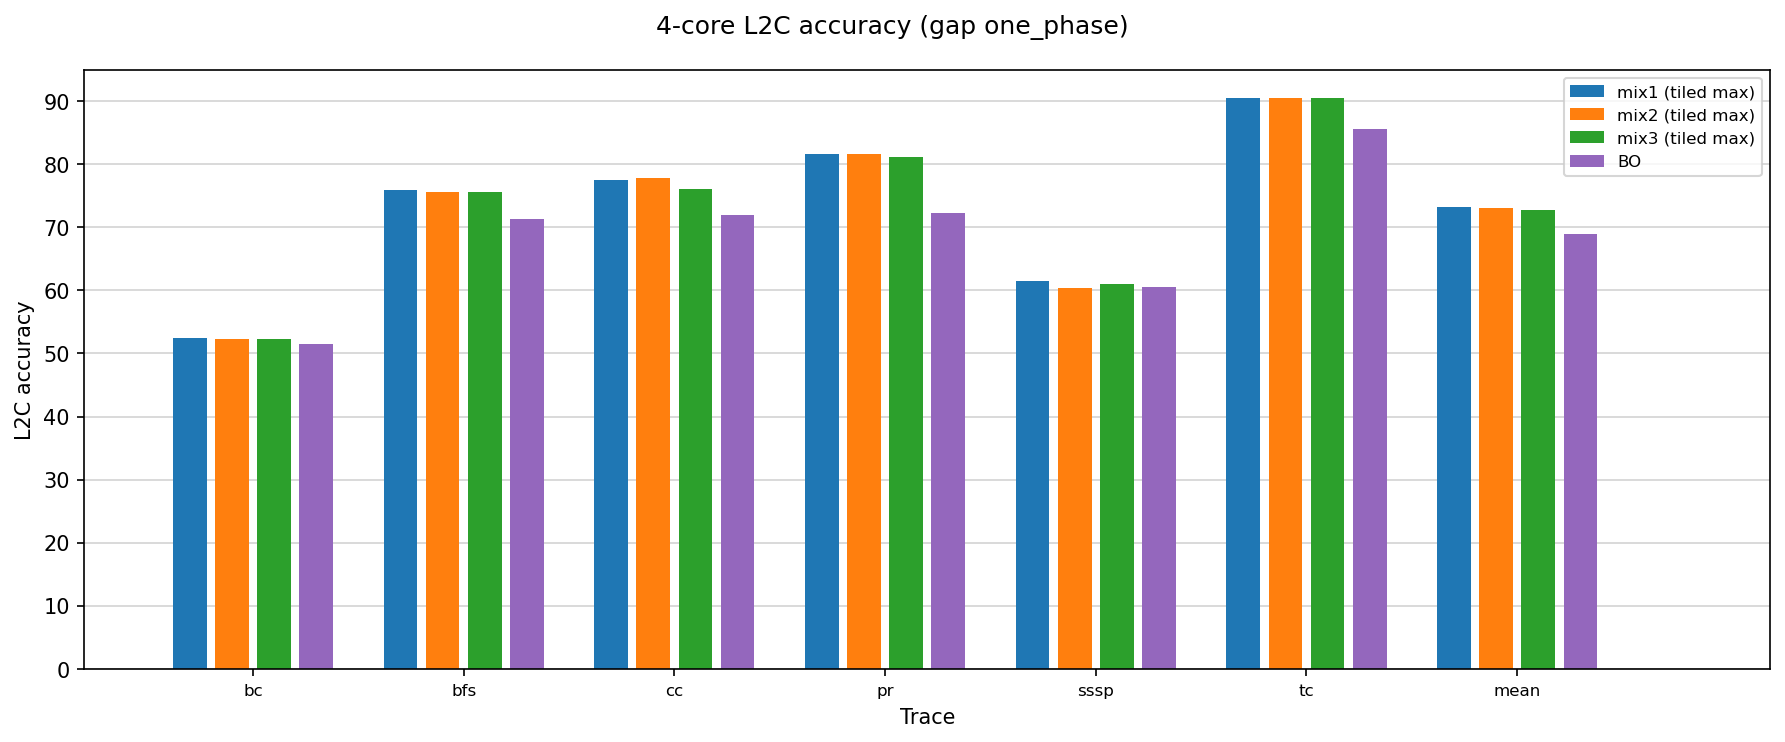

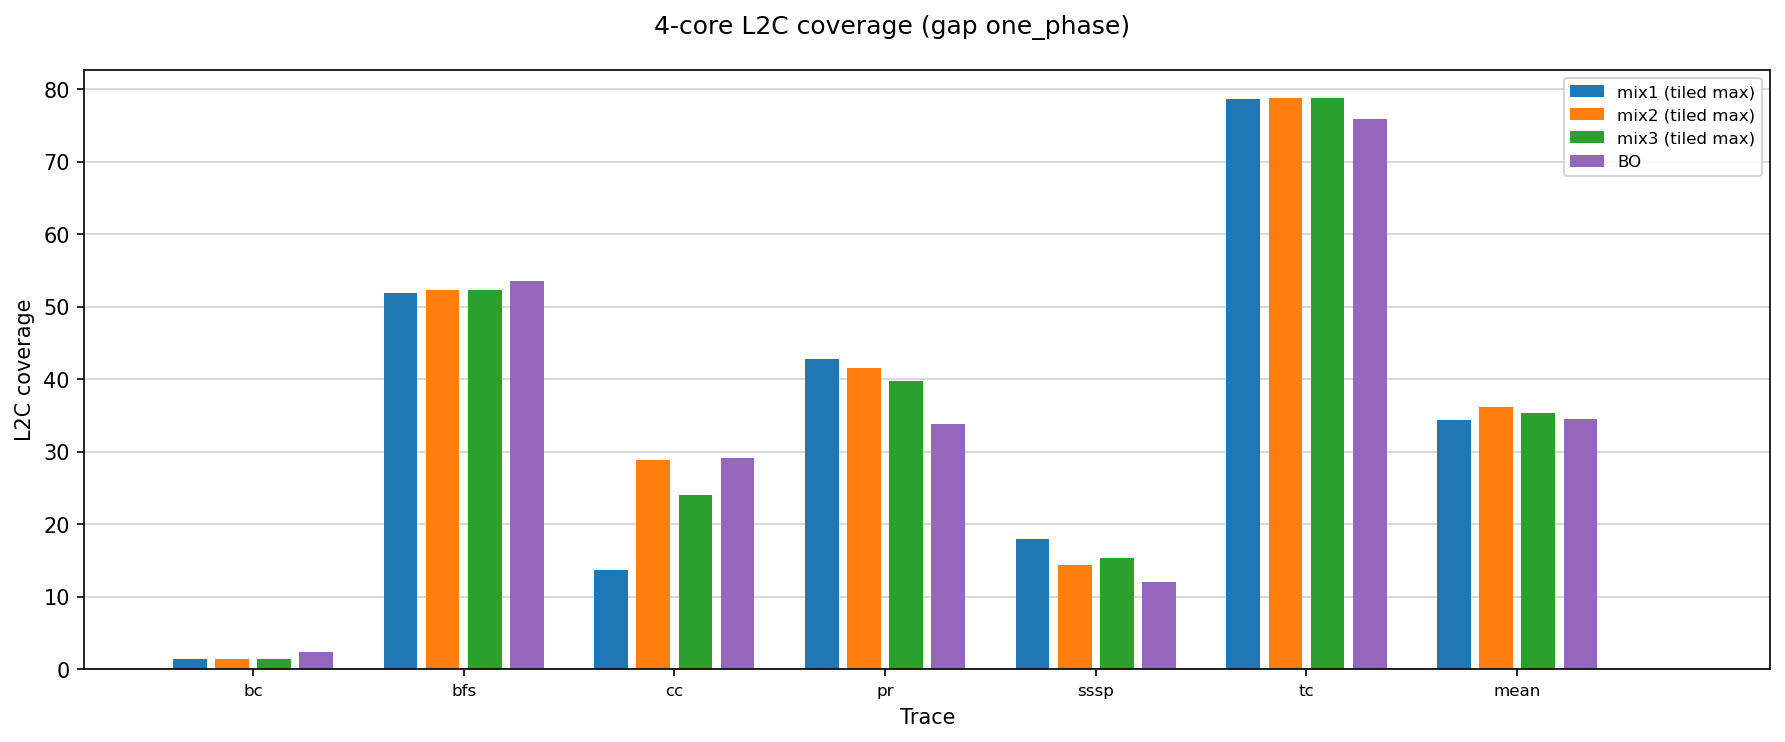

In [5]:
df_4core = {
    'mix1 (tiled max)': dfs['degree1_4c']['Delta_Path, PC_Delta'],
    'mix2 (tiled max)': dfs['degree1_4c']['Delta_Path, PC_Delta, Page'],
    'mix3 (tiled max)': dfs['degree1_4c']['Delta_Path, Offset, PC_Delta, Page'],
    'BO': dfs['baseline_4c']['bo'],
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
df_4core_colors = {
    'BO': 'C4'
}
label_kwargs = {
    'fontsize': 8,
    'rotation': 0
}
plots.plot_everything(df_4core, suites=suites, metrics=metrics, 
                      colors=df_4core_colors, dpi=dpi, figsize=(12, 5),
                      suptitle='4-core',
                      legend_kwargs=legend_kwargs, label_kwargs=label_kwargs)

## 8-core

=== spec06 one_phase ===


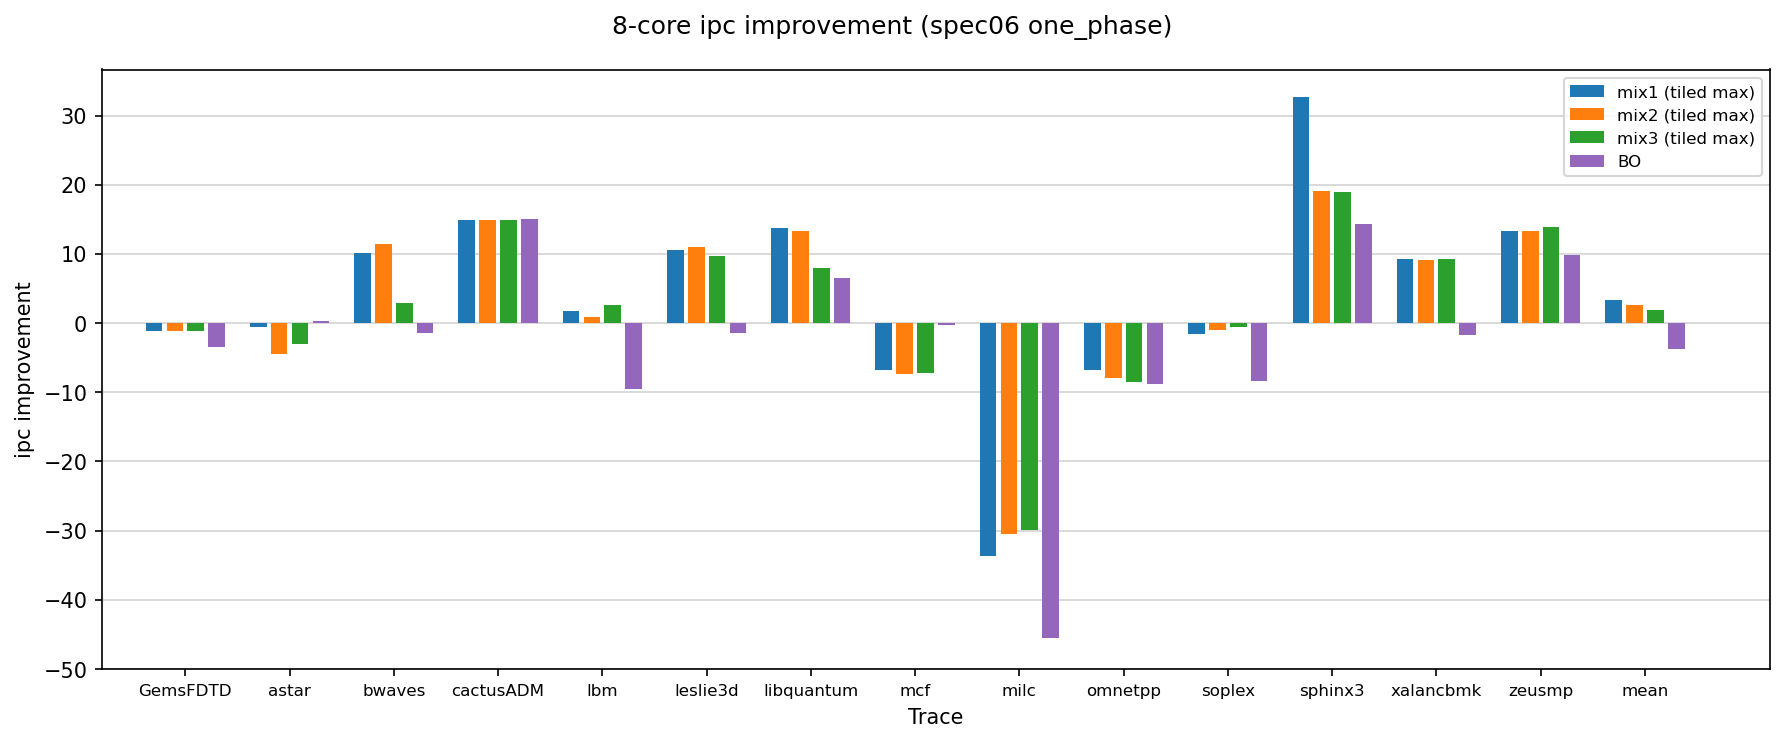

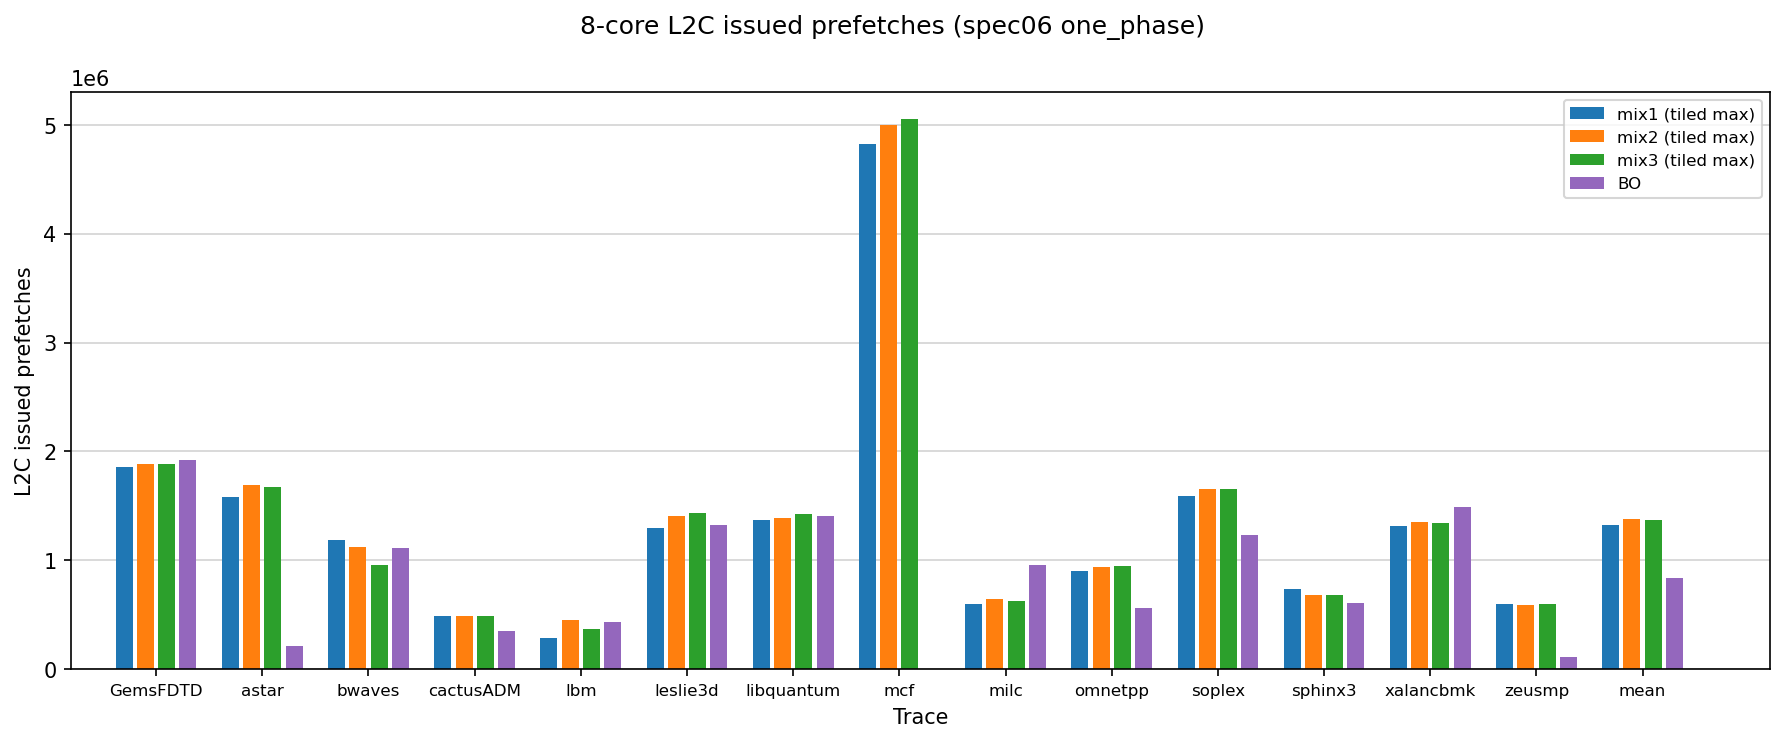

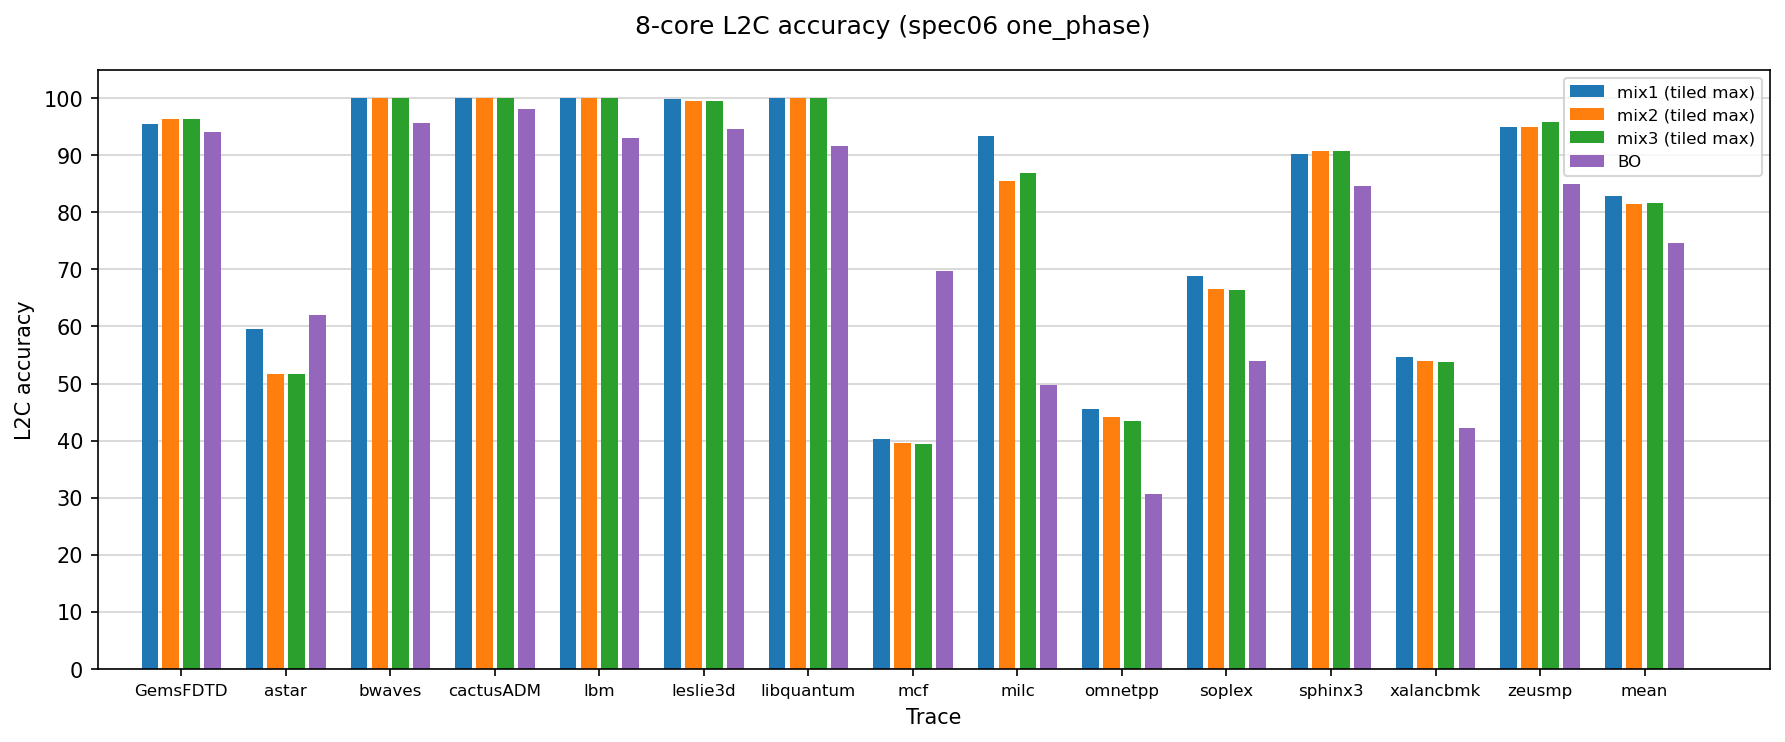

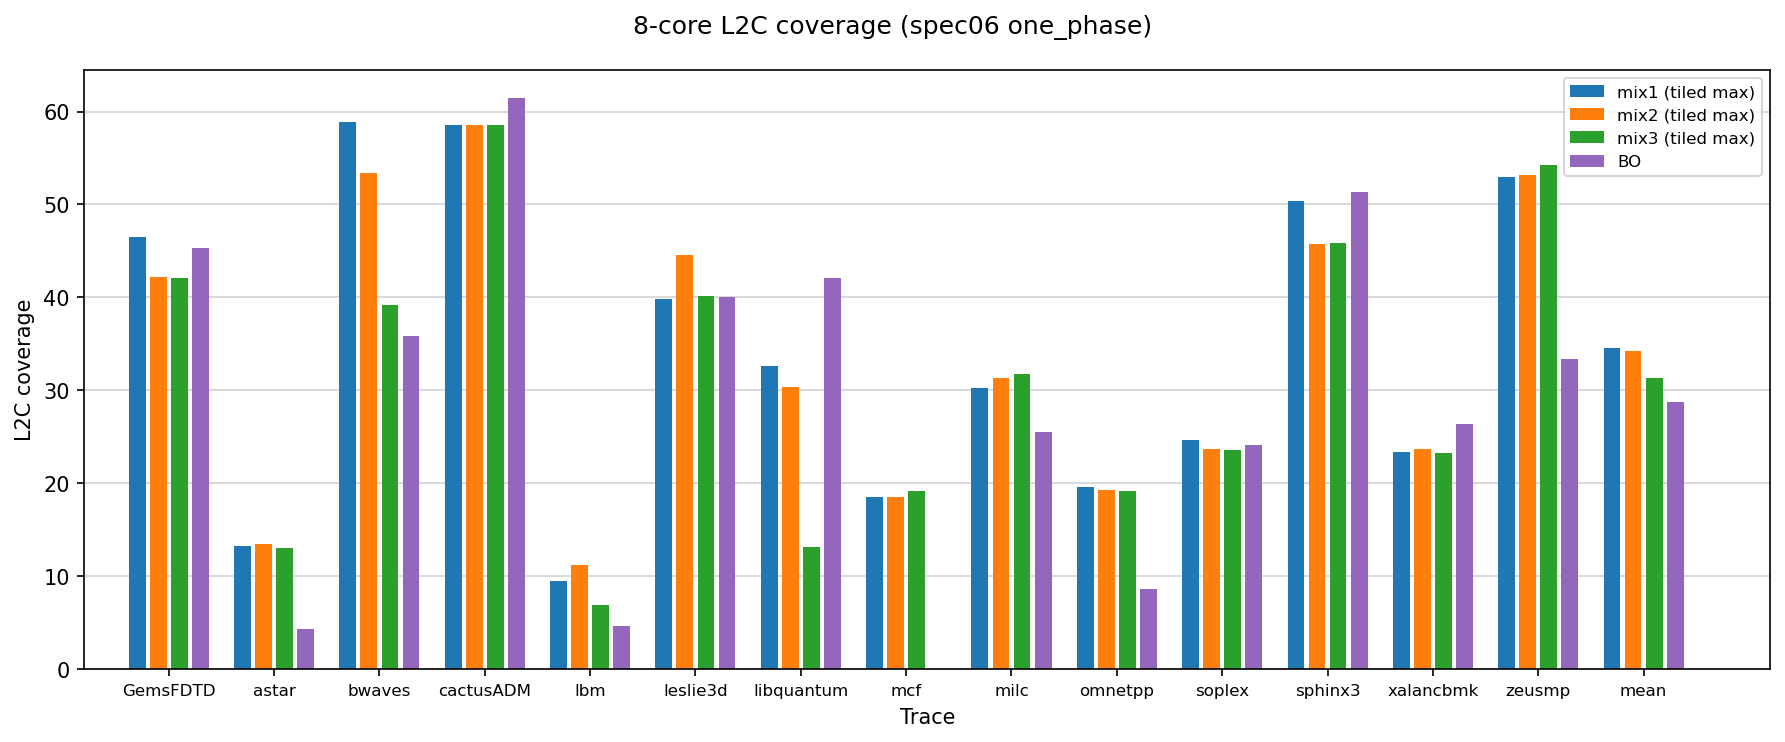

=== gap one_phase ===


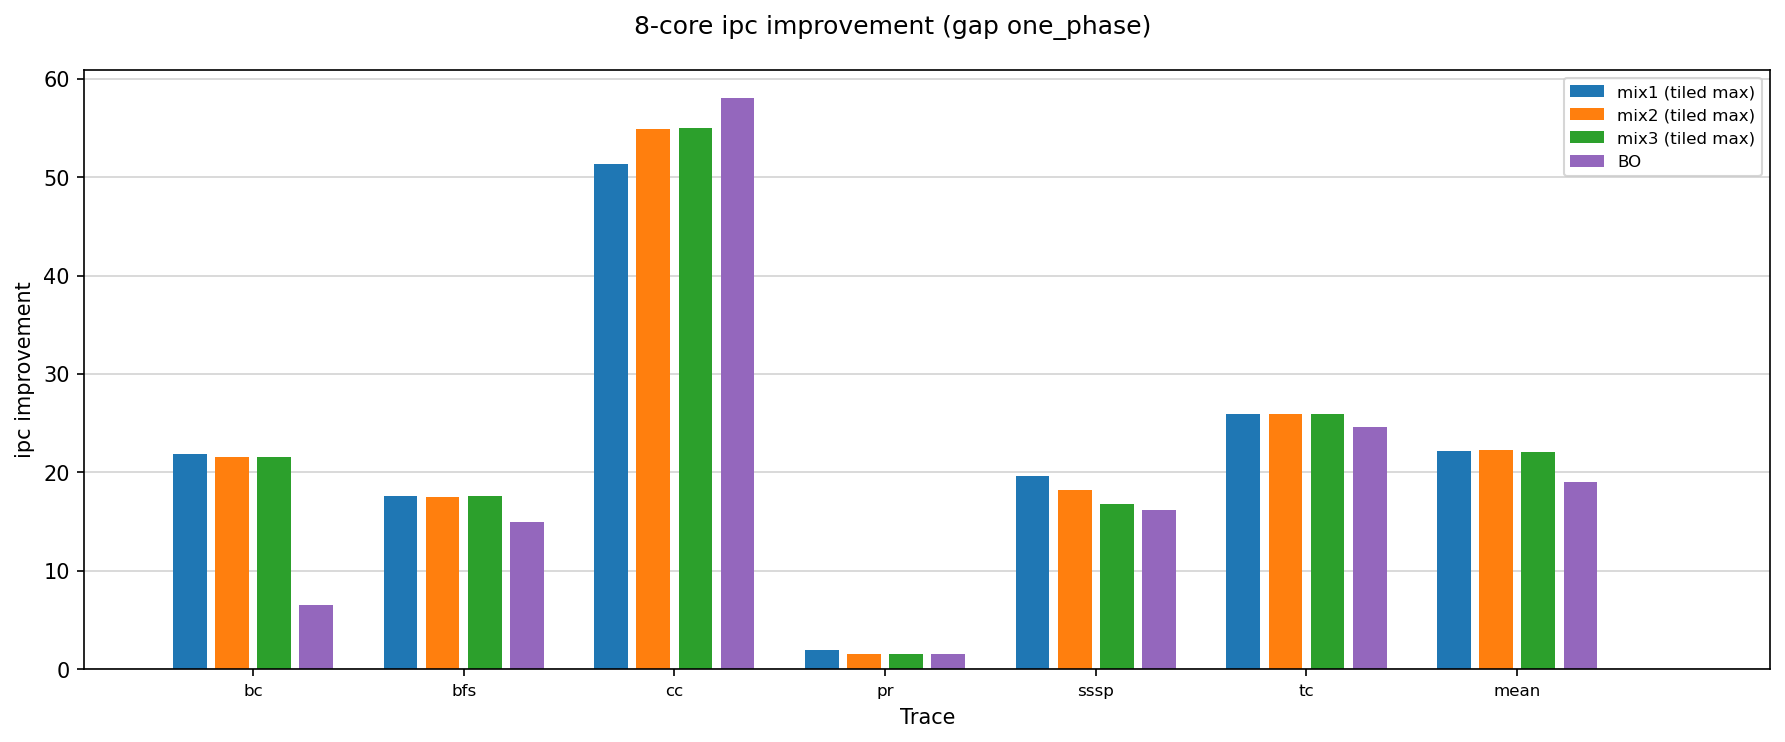

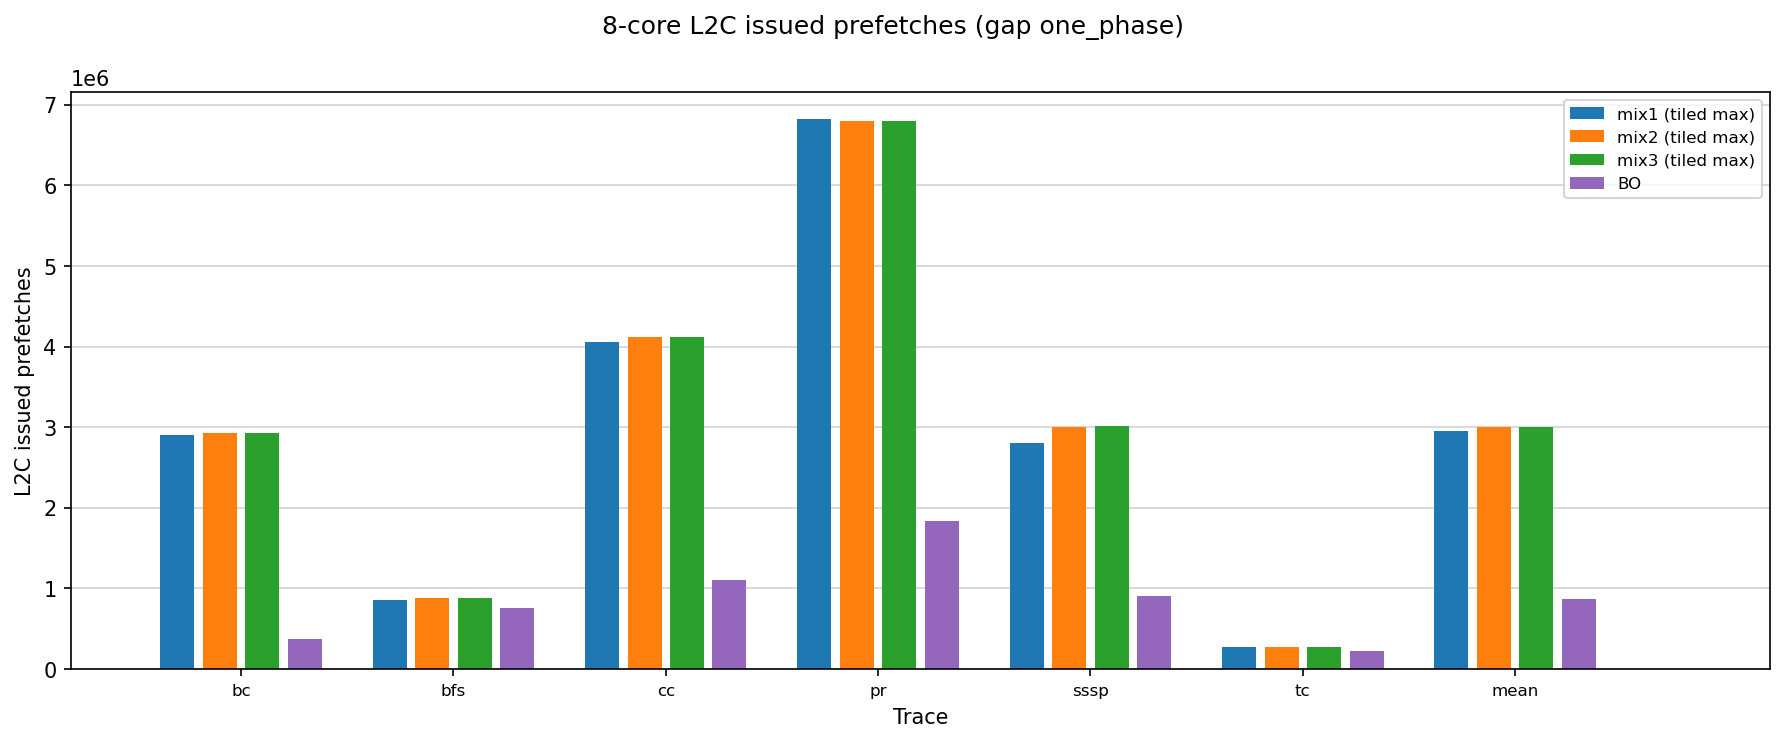

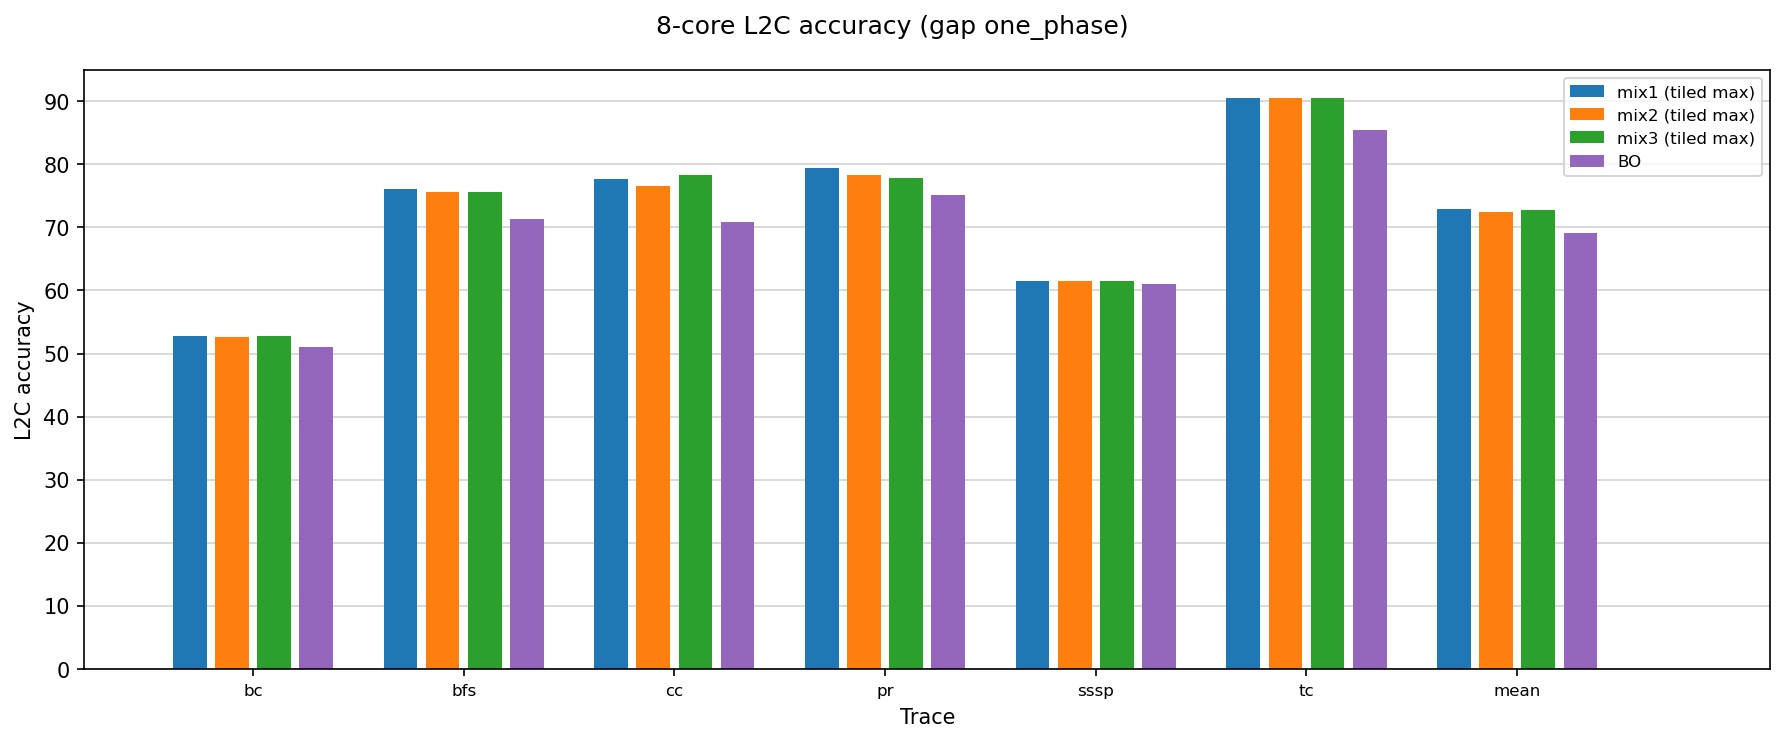

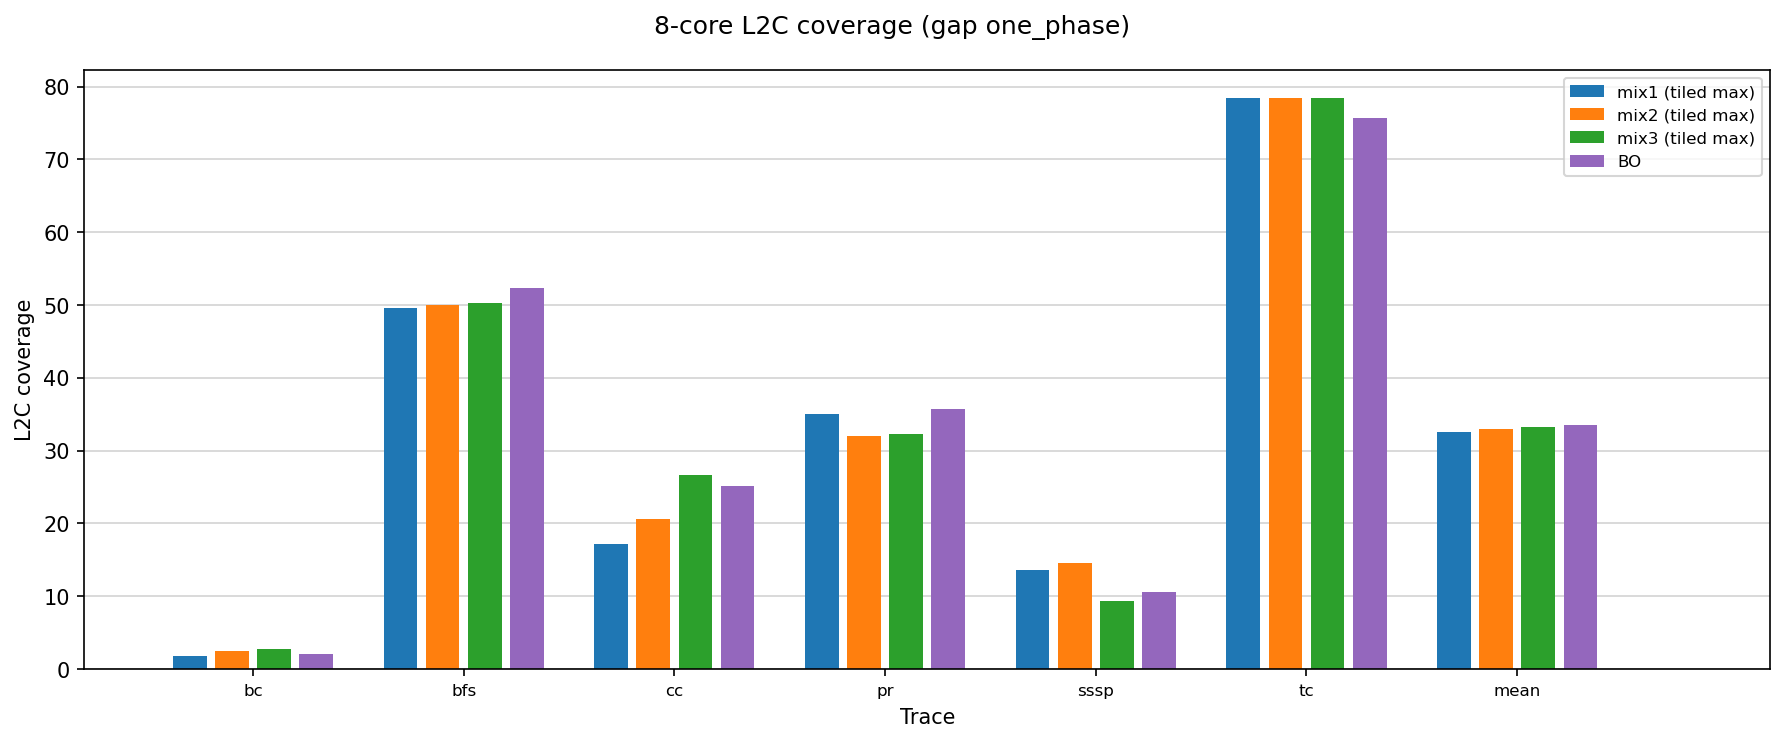

In [5]:
df_8core = {
    'mix1 (tiled max)': dfs['degree1_8c']['Delta_Path, PC_Delta'],
    'mix2 (tiled max)': dfs['degree1_8c']['Delta_Path, PC_Delta, Page'],
    'mix3 (tiled max)': dfs['degree1_8c']['Delta_Path, Offset, PC_Delta, Page'],
    'BO': dfs['baseline_8c']['bo'],
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
df_8core_colors = {
    'BO': 'C4'
}
label_kwargs = {
    'fontsize': 8,
    'rotation': 0
}
plots.plot_everything(df_8core, suites=suites, metrics=metrics, 
                      colors=df_8core_colors, dpi=dpi, figsize=(12, 5),
                      suptitle='8-core',
                      legend_kwargs=legend_kwargs, label_kwargs=label_kwargs)

# Tables

## 2-core

In [5]:
tables.table_everything(df_2core, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,35.115381,35.866709,35.524214,33.674454
astar_weighted,7.048583,7.251873,7.283337,-0.041291
bwaves_weighted,46.878634,45.627608,47.317582,43.858087
cactusADM_weighted,8.133379,8.133379,8.133379,7.853345
lbm_weighted,9.779953,7.260680,4.799194,10.366257
leslie3d_weighted,29.972817,29.199446,29.766812,36.555489
libquantum_weighted,43.453543,42.598822,26.839081,50.294265
mcf_weighted,22.553971,22.526570,22.577320,0.006070
milc_weighted,0.857341,2.149989,1.492795,-7.280164


L2C_accuracy


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,94.898018,95.307740,95.314621,94.108424
astar_weighted,57.144853,56.843394,55.279277,47.720438
bwaves_weighted,99.573513,99.573644,99.573721,94.702560
cactusADM_weighted,99.932514,99.932514,99.932514,98.096294
lbm_weighted,99.987314,99.987409,99.987912,93.129169
leslie3d_weighted,99.895195,99.895831,99.874110,95.285113
libquantum_weighted,99.998365,99.998459,99.998471,89.738454
mcf_weighted,46.828872,46.766915,46.794421,63.372982
milc_weighted,91.773680,78.270832,80.214646,57.666290


L2C_coverage


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,58.202685,54.323899,54.426300,48.280760
astar_weighted,12.263439,12.553456,12.498099,0.060634
bwaves_weighted,61.887424,61.854112,57.653153,56.181434
cactusADM_weighted,58.268540,58.268540,58.268540,61.513835
lbm_weighted,8.661189,8.572551,7.242527,14.327665
leslie3d_weighted,27.291150,26.808337,30.859267,37.219851
libquantum_weighted,35.735815,39.072135,24.977852,50.887867
mcf_weighted,29.082501,29.025335,29.102766,0.020823
milc_weighted,21.163685,20.329806,20.615655,26.957626


=== gap one_phase ===
ipc_improvement


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,26.857059,26.759565,26.710935,8.937405
bfs,28.920911,29.287414,29.247711,26.360698
cc,43.706576,44.759918,41.807685,47.506484
pr,1.579436,1.822413,1.624284,1.906880
sssp,21.564399,21.060484,22.460191,18.588951
tc,25.084894,25.091074,25.082430,23.896731
mean,23.971528,24.129852,23.885623,20.360677


L2C_accuracy


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,52.805703,52.802021,52.800134,52.379131
bfs,75.627615,75.503912,75.563469,71.291564
cc,79.305989,79.134140,79.012067,71.901521
pr,77.420116,78.398560,77.951267,71.873239
sssp,60.124764,59.522715,58.808044,60.535380
tc,90.506400,90.503056,90.506610,85.720092
mean,72.631764,72.644068,72.440265,68.950155


L2C_coverage


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,1.156791,1.196756,1.153588,3.522427
bfs,53.729961,54.348692,54.527954,54.197699
cc,23.828007,27.612205,24.191651,30.808072
pr,33.985781,35.393242,34.292256,37.811360
sssp,15.232406,12.040673,16.766433,13.947438
tc,79.159299,79.148873,79.139126,76.431429
mean,34.515374,34.956740,35.011835,36.119737


## 4-core

In [7]:
tables.table_everything(df_4core, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,11.876488,11.898759,11.549253,10.287880
astar_weighted,3.389136,3.241223,3.628811,-0.529690
bwaves_weighted,18.458181,19.502762,15.872793,10.505037
cactusADM_weighted,11.053455,11.004658,11.004658,10.704170
lbm_weighted,3.112789,2.054639,3.254510,1.410858
leslie3d_weighted,11.873011,12.160231,11.543284,11.756611
libquantum_weighted,29.292994,26.887877,17.611070,27.096968
mcf_weighted,14.144248,14.065370,NaN,0.029358
omnetpp_weighted,-0.433912,-1.352615,-1.911784,-2.670854


L2C_accuracy


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,94.807281,95.306380,95.302060,94.122726
astar_weighted,57.185409,56.044086,54.338728,39.847288
bwaves_weighted,99.600253,99.607871,99.608833,94.969637
cactusADM_weighted,99.932108,99.932900,99.932900,98.139243
lbm_weighted,99.987011,99.986242,99.988584,93.123938
leslie3d_weighted,99.874608,99.847401,99.849288,95.404262
libquantum_weighted,99.998528,99.998513,99.998516,89.930965
mcf_weighted,48.036501,47.755887,NaN,54.860208
omnetpp_weighted,44.233794,42.228100,42.003221,31.731096


L2C_coverage


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,55.275105,51.827115,51.711092,46.098924
astar_weighted,11.975616,11.995015,12.001987,-0.053925
bwaves_weighted,53.939513,51.650868,49.308758,41.480082
cactusADM_weighted,58.852802,58.854025,58.854025,61.279948
lbm_weighted,9.052454,10.710199,7.000714,14.744376
leslie3d_weighted,30.014985,30.361151,31.795831,35.831726
libquantum_weighted,33.099582,28.726825,20.273640,45.217413
mcf_weighted,28.491238,28.629549,NaN,0.014667
omnetpp_weighted,19.344886,18.949844,19.070440,8.365557


=== gap one_phase ===
ipc_improvement


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,24.622495,24.440062,24.380758,8.142271
bfs,25.908726,26.305657,26.276055,23.905105
cc,47.356830,54.652296,53.686620,54.029117
pr,3.030311,2.790416,2.475049,1.219967
sssp,21.632026,21.295147,21.092412,18.510218
tc,25.808758,25.804432,25.818842,24.533133
mean,24.057891,24.989030,24.747495,20.642150


L2C_accuracy


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,52.389315,52.343071,52.324828,51.476042
bfs,75.950451,75.550852,75.594769,71.374588
cc,77.479733,77.734393,76.102719,71.928686
pr,81.548228,81.628570,81.063825,72.270660
sssp,61.537062,60.396682,61.077407,60.593225
tc,90.444146,90.468555,90.464718,85.537288
mean,73.224823,73.020354,72.771378,68.863415


L2C_coverage


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,1.377426,1.407487,1.420965,2.320367
bfs,51.889480,52.230550,52.316117,53.493363
cc,13.719495,28.821916,24.030561,29.092591
pr,42.826513,41.496159,39.704127,33.774786
sssp,17.905939,14.307160,15.294626,11.975130
tc,78.692879,78.725232,78.755070,75.889854
mean,34.401955,36.164751,35.253578,34.424349


## 8-core

In [ ]:
tables.table_everything(df_8core, suites=suites, metrics=metrics)